In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score,average_precision_score, recall_score, f1_score,precision_recall_curve, auc, classification_report, confusion_matrix, make_scorer, fbeta_score
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.utils import resample
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from scipy import stats
import statsmodels.tools as sm_tools
import statsmodels.stats.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.genmod.generalized_linear_model import GLM
from statsmodels.genmod.families import Binomial
from statsmodels.genmod.families.links import logit
from statsmodels.tools import add_constant
from imblearn.over_sampling import SMOTE, RandomOverSampler, ADASYN
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import BaggingClassifier



In [2]:
df_train=pd.read_csv('../data/output/categorical_dfs/development_sample_cleaned_categorical.csv')
df_test=pd.read_csv('../data/output/categorical_dfs/testing_sample_cleaned_categorical.csv')

In [3]:
df_train = df_train.drop(['ID', 'customer_id'], axis=1)
df_test = df_test.drop(['ID', 'customer_id'], axis=1)

Optimization terminated successfully.
         Current function value: 0.119968
         Iterations 8


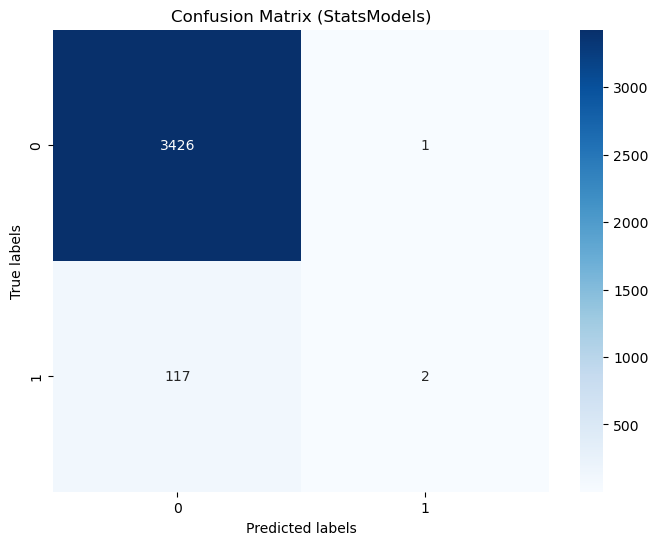

In [4]:
import statsmodels.api as sm

X_train = df_train.drop('target', axis=1)
y_train = df_train['target']
X_test = df_test.drop('target', axis=1)
y_test = df_test['target']
# Przygotowanie danych
X_train_sm = sm.add_constant(X_train)  # Dodanie kolumny stałej
y_train_sm = y_train

# Budowa modelu regresji logistycznej
model_sm = sm.Logit(y_train_sm, X_train_sm).fit()

# Przewidywanie prawdopodobieństw dla danych testowych
X_test_sm = sm.add_constant(X_test)  # Uwzględnienie stałej w danych testowych
y_pred_prob_sm = model_sm.predict(X_test_sm)

# Zamiana prawdopodobieństw na etykiety klasy na podstawie domyślnego progu 0.5
y_pred_sm = (y_pred_prob_sm >= 0.5).astype(int)

# Generowanie macierzy pomyłek
conf_matrix_sm = confusion_matrix(y_test, y_pred_sm)

# Wizualizacja macierzy pomyłek
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_sm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix (StatsModels)')
plt.show()


In [5]:
# Dopasowanie modelu i wyświetlenie podsumowania
model_summary = model_sm.summary()
model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                35700
Model:                          Logit   Df Residuals:                    35669
Method:                           MLE   Df Model:                           30
Date:                Thu, 14 Mar 2024   Pseudo R-squ.:                  0.1285
Time:                        12:36:38   Log-Likelihood:                -4282.9
converged:                       True   LL-Null:                       -4914.1
Covariance Type:            nonrobust   LLR p-value:                1.289e-246
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -3.3380      0.660     -5.061      0.000      -4.631      -2.045
MOB                 -0.0104      0.045     -0.233      0.816      -0.098       0.077
Var1                -0.1253      0.095     -1.324      0.186      -0.311       0.060
Var4                 0.0564      0.037      1.517      0.129      -0.016       0.129
Var5                -0.0229      0.029     -0.797      0.425      -0.079       0.033
Var6                -0.0189      0.045     -0.422      0.673      -0.107       0.069
Var7                -0.0994      0.035     -2.869      0.004      -0.167      -0.032
Var15               -0.1452      0.059     -2.455      0.014      -0.261      -0.029
Var16                0.0499      0.048      1.045      0.296      -0.044       0.143
Var24               -0.1559      0.115     -1.356      0.175      -0.381       0.069
Var29                0.5197      0.050     10.408      0.000       0.422       0.618
Var30               -0.0003      0.057     -0.005      0.996      -0.113       0.112
Var3                 0.0678      0.050      1.351      0.177      -0.031       0.166
Var11               -0.0557      0.031     -1.819      0.069      -0.116       0.004
Var12               -0.0812      0.042     -1.946      0.052      -0.163       0.001
Var14                0.0934      0.025      3.765      0.000       0.045       0.142
Var27                0.3958      0.164      2.417      0.016       0.075       0.717
Var28                1.6759      0.103     16.349      0.000       1.475       1.877
income              -0.3170      0.029    -10.832      0.000      -0.374      -0.260
loan_desc            0.3003      0.060      4.977      0.000       0.182       0.419
Var8_q              -0.0913      0.017     -5.372      0.000      -0.125      -0.058
Var25_q             -0.0527      0.011     -4.966      0.000      -0.074      -0.032
Var26_q             -0.0405      0.010     -3.983      0.000      -0.060      -0.021
Var20_1              0.0146      0.073      0.199      0.842      -0.129       0.158
Var21_1              0.0308      0.087      0.353      0.724      -0.140       0.202
Var22_1              0.1329      0.101      1.314      0.189      -0.065       0.331
Var23_1             -0.0031      0.080     -0.039      0.969      -0.161       0.154
Var17_1              0.4260      0.023     18.657      0.000       0.381       0.471
working_months_1    -0.0171      0.011     -1.503      0.133      -0.039       0.005
ii_ratio             0.1796      0.028      6.463      0.000       0.125       0.234
idi_ratio           -0.0928      0.014     -6.594      0.000      -0.120      -0.065
====================================================================================
"""

In [6]:
# Obliczanie przewidywanych etykiet dla zbioru uczącego na podstawie domyślnego progu 0.5
y_pred_train_sm = (model_sm.predict(X_train_sm) >= 0.5).astype(int)

# Obliczanie metryk dla zbioru uczącego
accuracy_train = accuracy_score(y_train_sm, y_pred_train_sm)
precision_train = precision_score(y_train_sm, y_pred_train_sm)
recall_train = recall_score(y_train_sm, y_pred_train_sm)
f1_train = f1_score(y_train_sm, y_pred_train_sm)

# Obliczanie metryk dla zbioru testowego
accuracy_test = accuracy_score(y_test, y_pred_sm)
precision_test = precision_score(y_test, y_pred_sm)
recall_test = recall_score(y_test, y_pred_sm)
f1_test = f1_score(y_test, y_pred_sm)

(accuracy_train, precision_train, recall_train, f1_train, accuracy_test, precision_test, recall_test, f1_test)

(0.9698879551820728,
 0.6585365853658537,
 0.04904632152588556,
 0.09129332206255285,
 0.9667230682459109,
 0.6666666666666666,
 0.01680672268907563,
 0.032786885245901634)

VIF = 1: Brak korelacji między daną zmienną a innymi zmiennymi.
1 < VIF < 5: Umiarkowana korelacja, która zazwyczaj nie jest problemem.
VIF >= 5: Wysoka korelacja, której warto się przyjrzeć, ponieważ może wskazywać na problem wielokolinearności.
VIF >= 10: Wskazuje na bardzo wysoką korelację i poważne problemy z wielokolinearnością, co może zakłócić analizę regresyjną.

1. There is no colinearity between variables 
2. Logit of probability depends for linear combination of independent variables

In [7]:

# Obliczenie VIF
VIF_data = pd.DataFrame()
VIF_data["variable"] = X_train.columns
VIF_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
print(VIF_data)


            variable        VIF
0                MOB  35.569436
1               Var1  13.177167
2               Var4  39.453219
3               Var5  20.627521
4               Var6   7.671549
5               Var7  37.266554
6              Var15   5.450621
7              Var16   5.885610
8              Var24   1.153548
9              Var29   1.120289
10             Var30  51.926905
11              Var3   8.161066
12             Var11  23.909539
13             Var12  62.527106
14             Var14   2.099043
15             Var27   1.394512
16             Var28   1.441931
17            income  35.892658
18         loan_desc  34.051592
19            Var8_q  18.168644
20           Var25_q   4.634520
21           Var26_q   5.719202
22           Var20_1   2.989561
23           Var21_1   7.699324
24           Var22_1  13.051507
25           Var23_1   9.878603
26           Var17_1  20.404830
27  working_months_1   3.465498
28          ii_ratio  26.784559
29         idi_ratio   7.165231


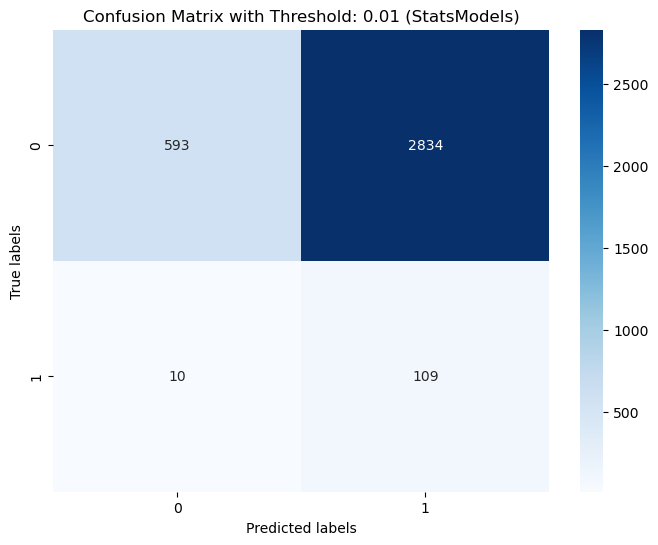

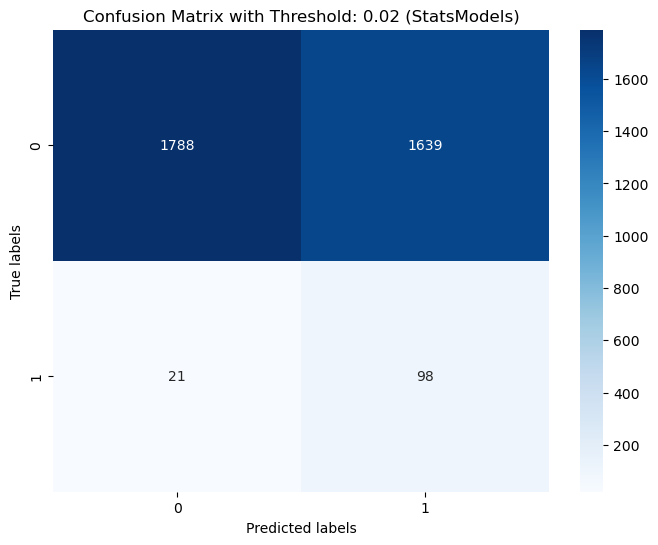

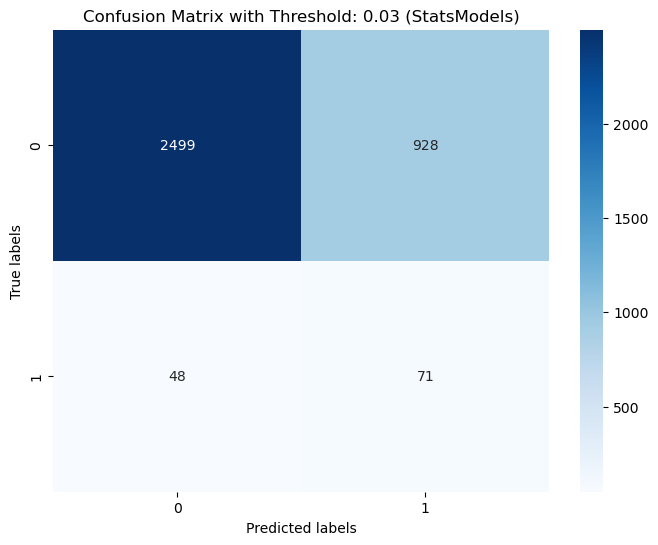

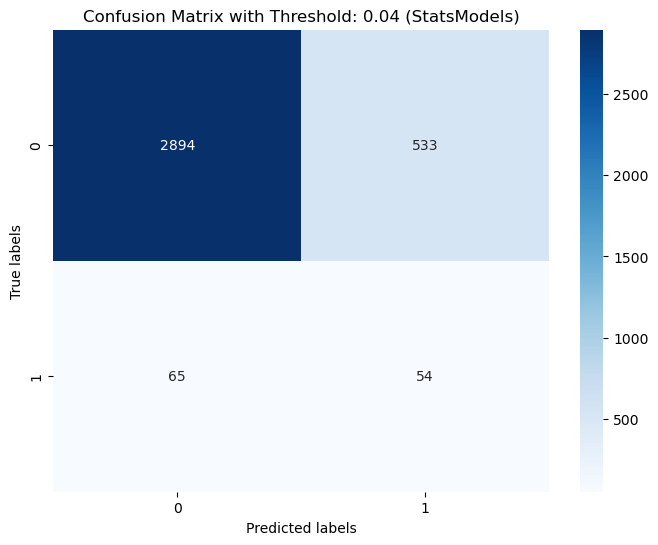

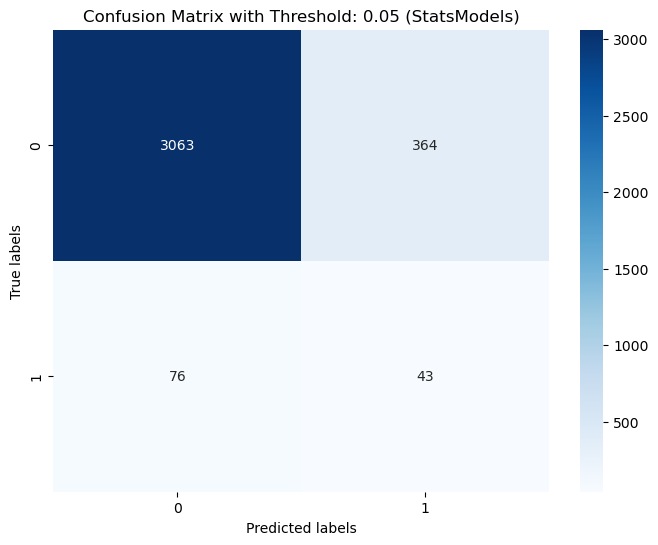

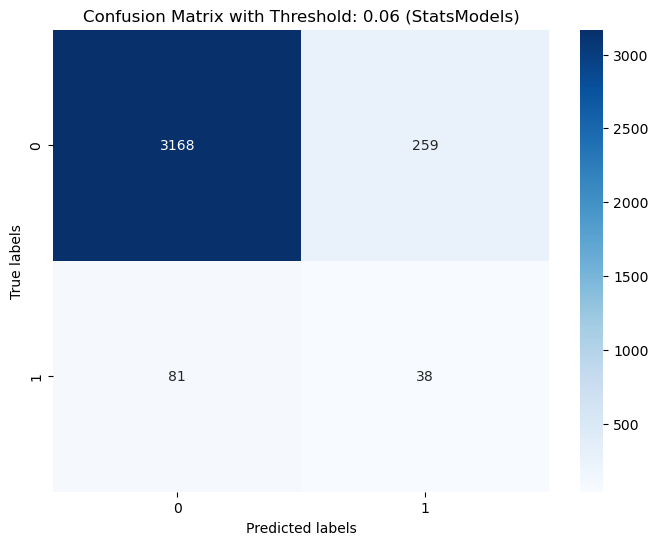

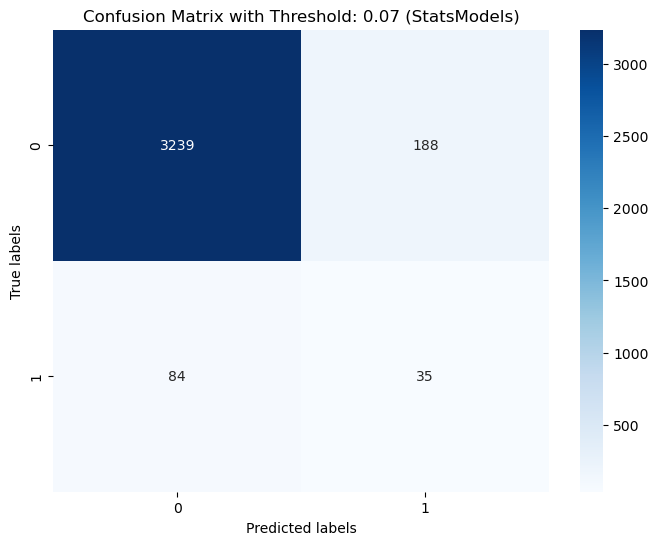

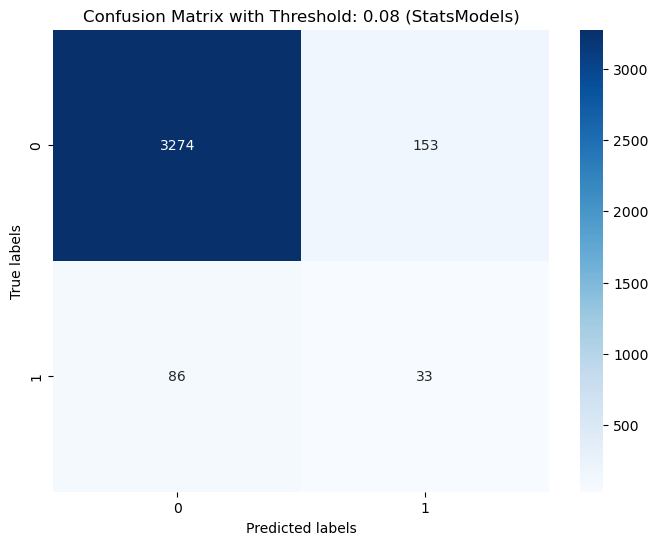

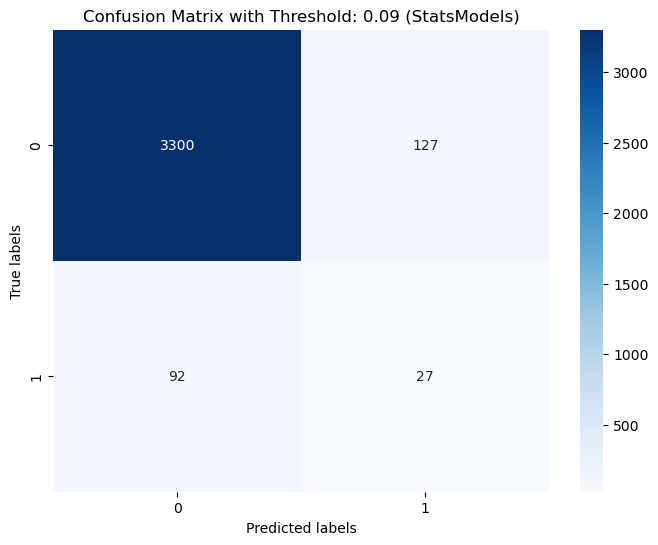

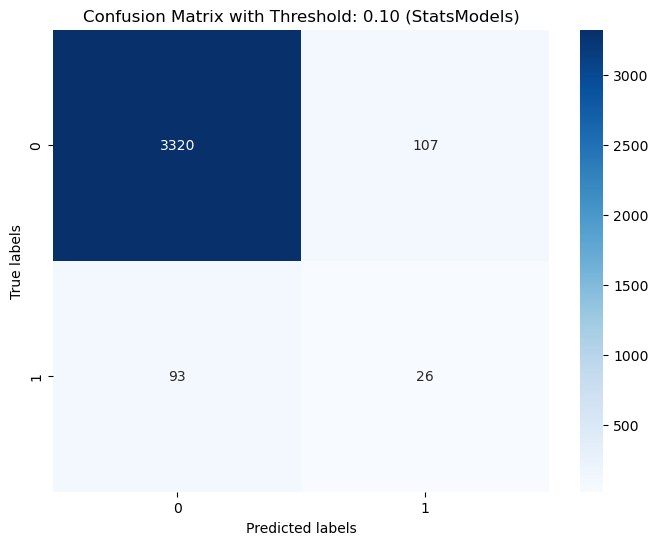

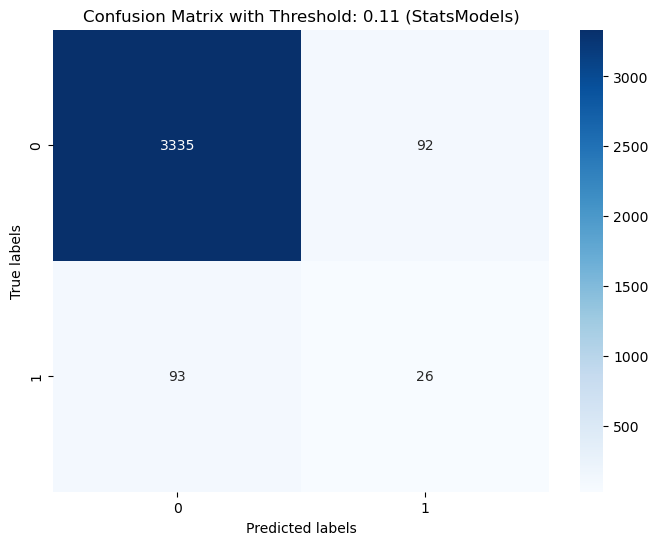

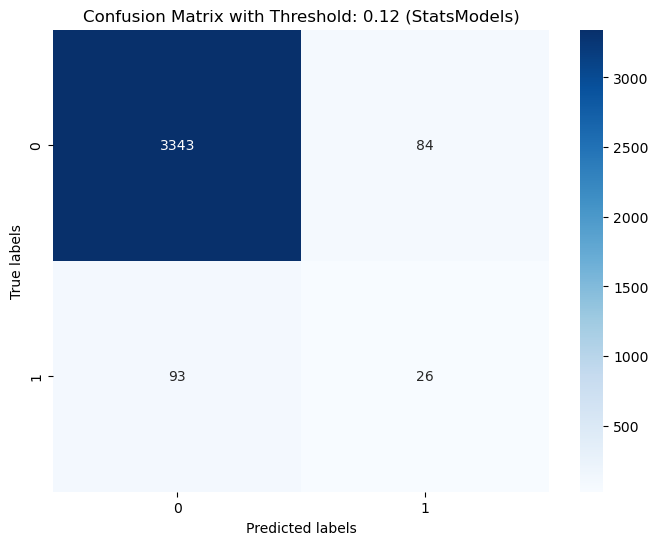

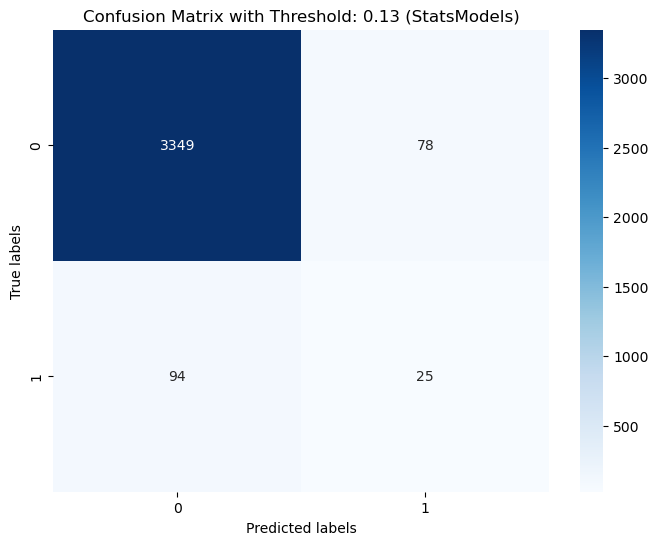

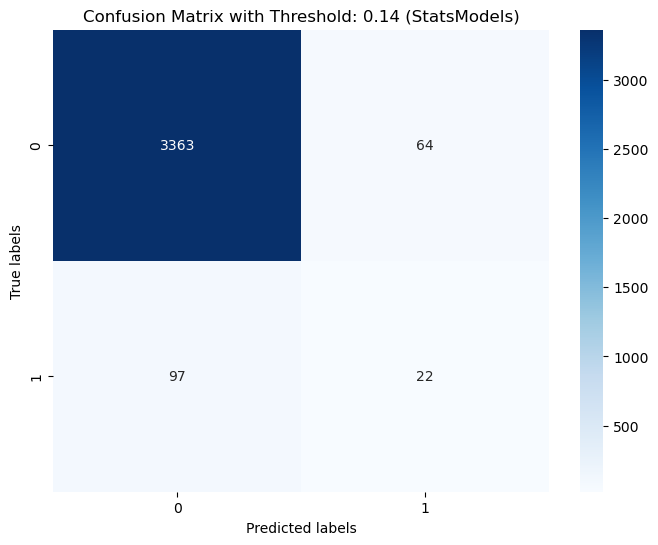

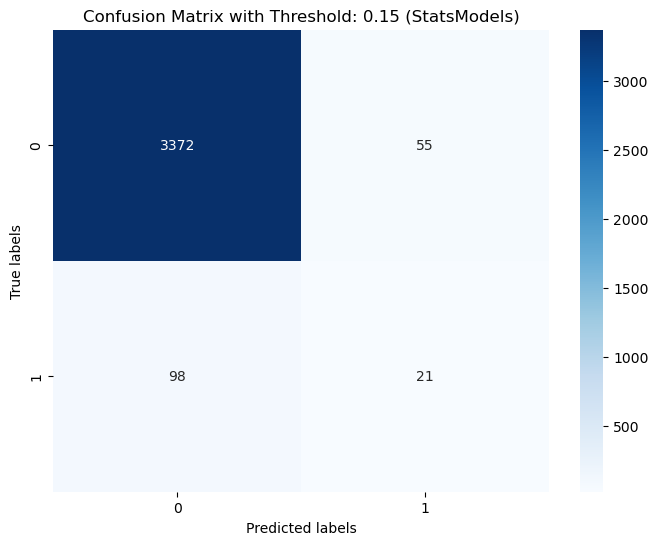

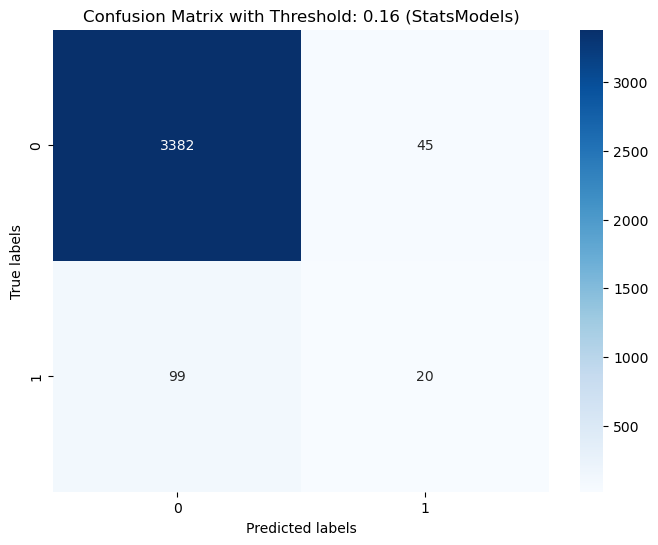

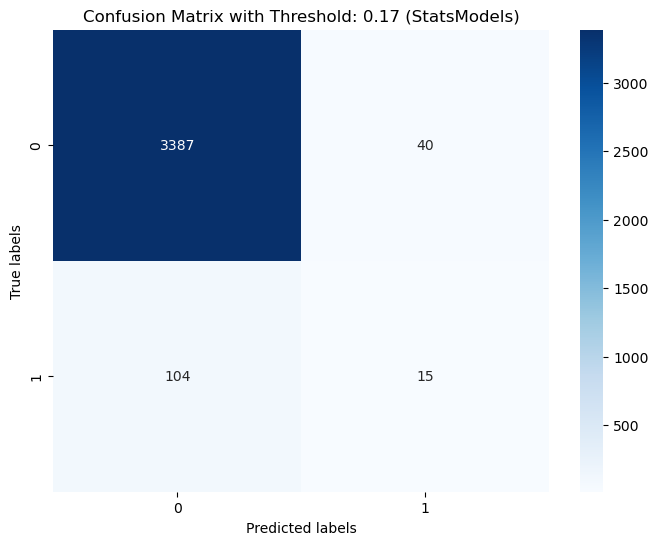

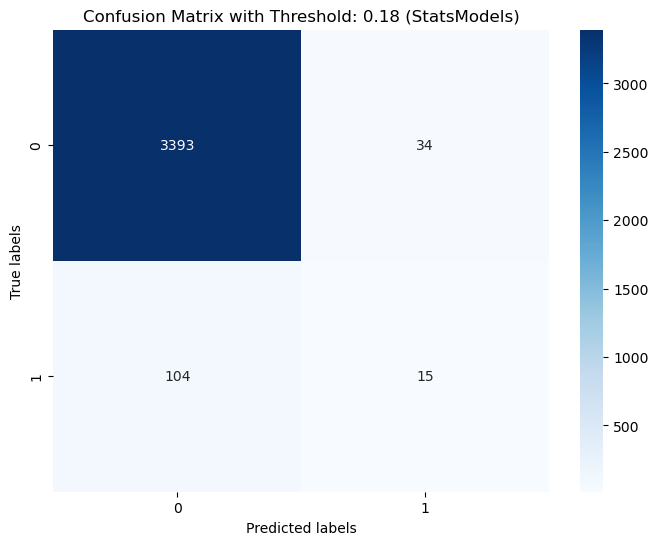

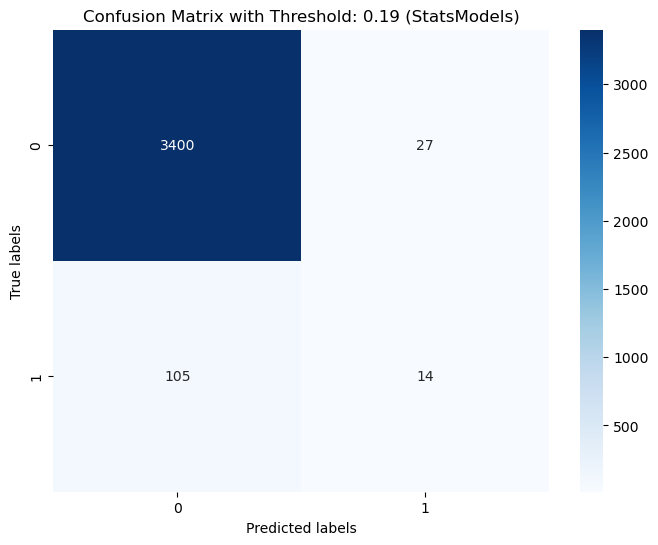

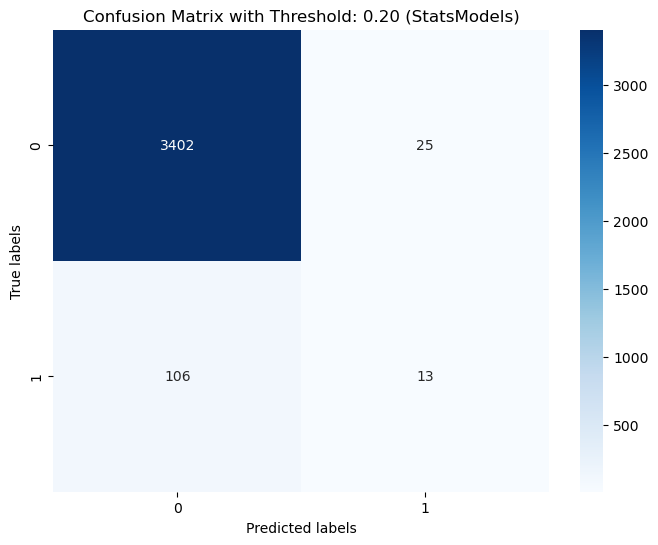

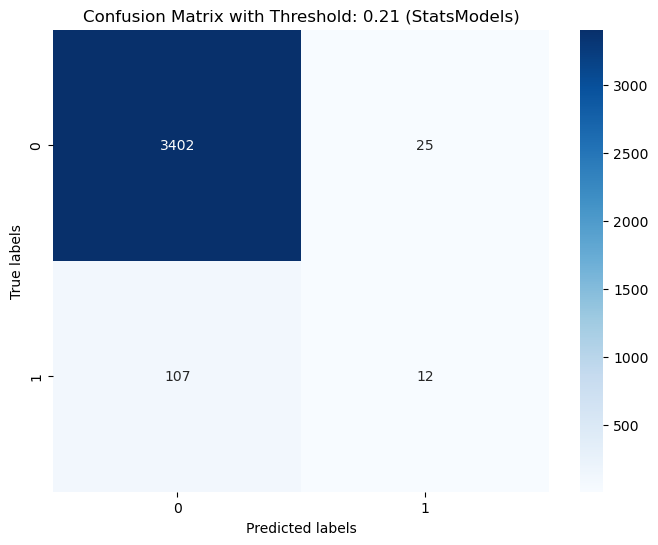

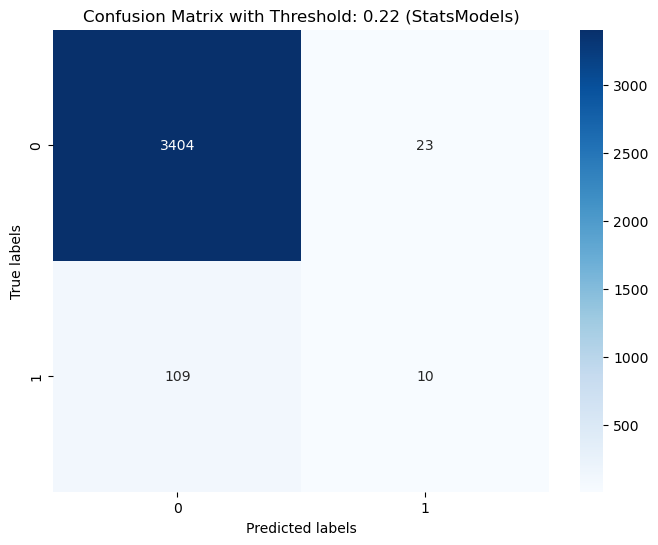

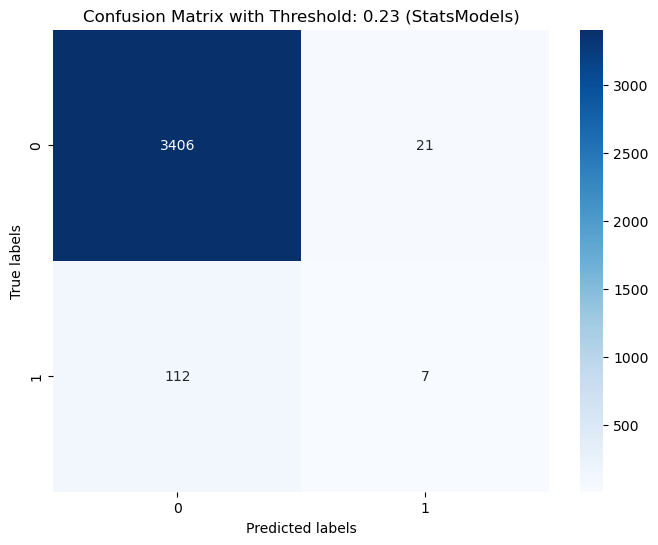

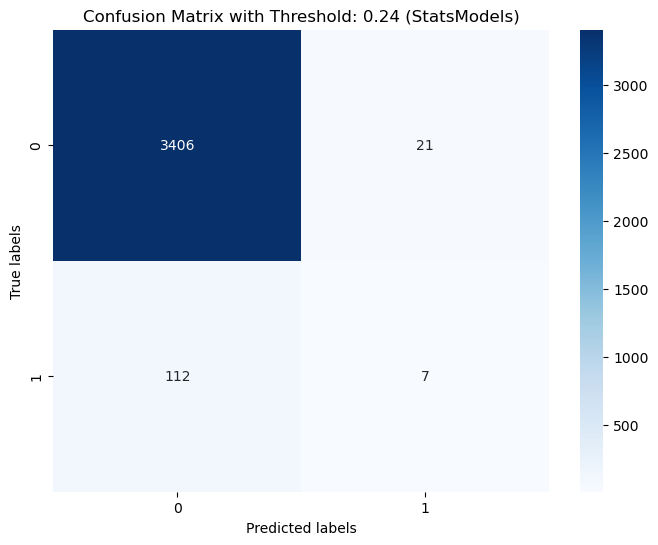

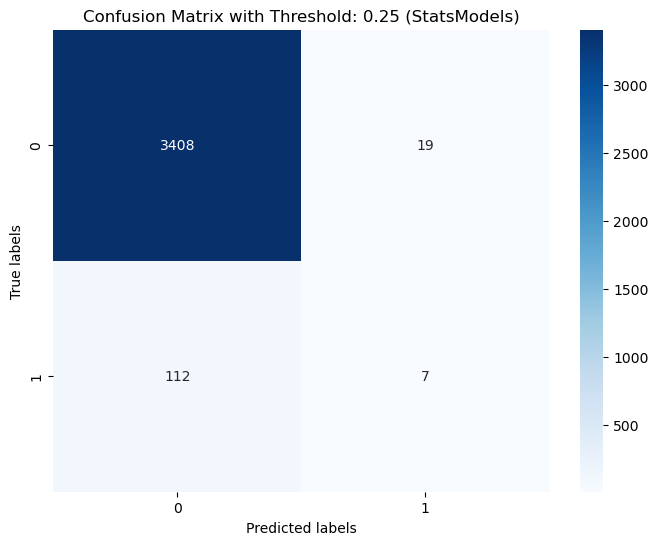

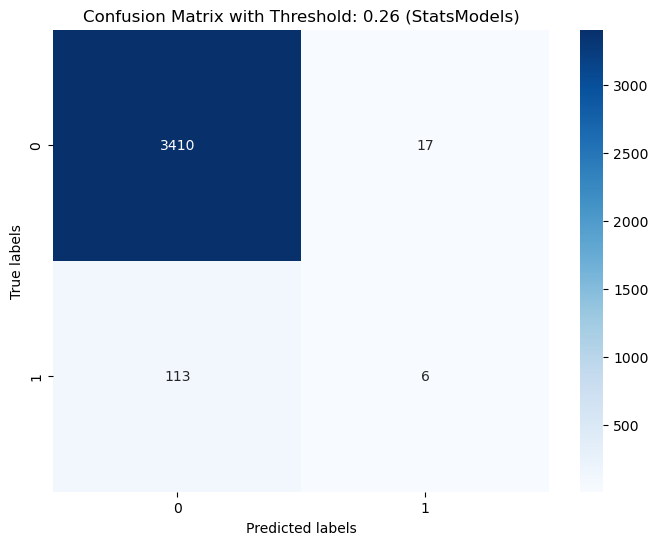

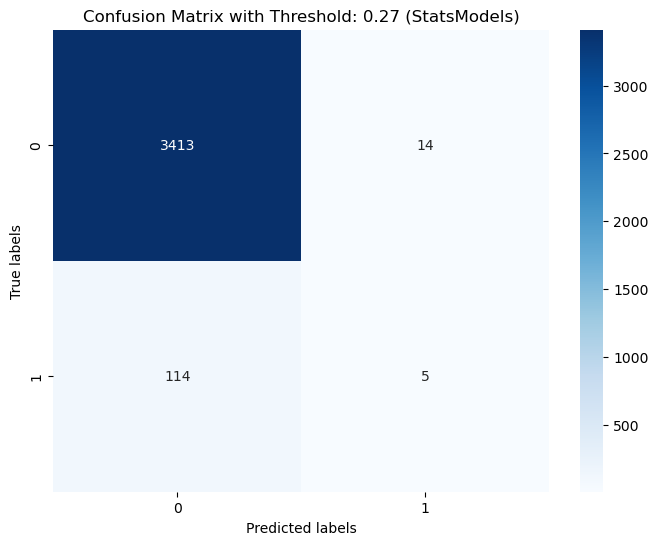

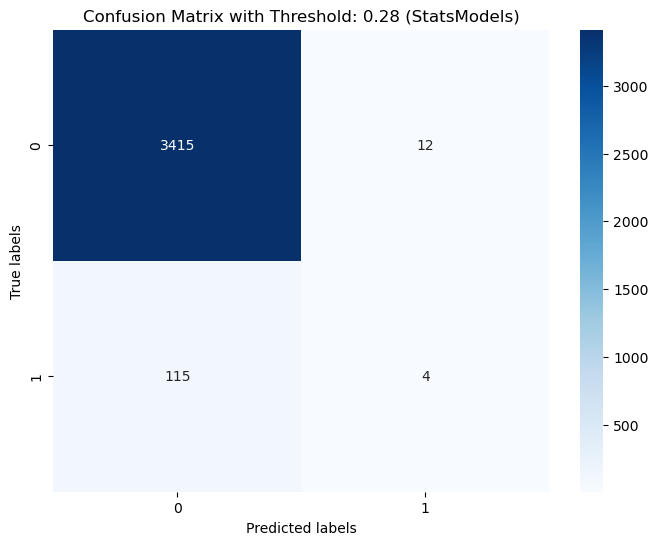

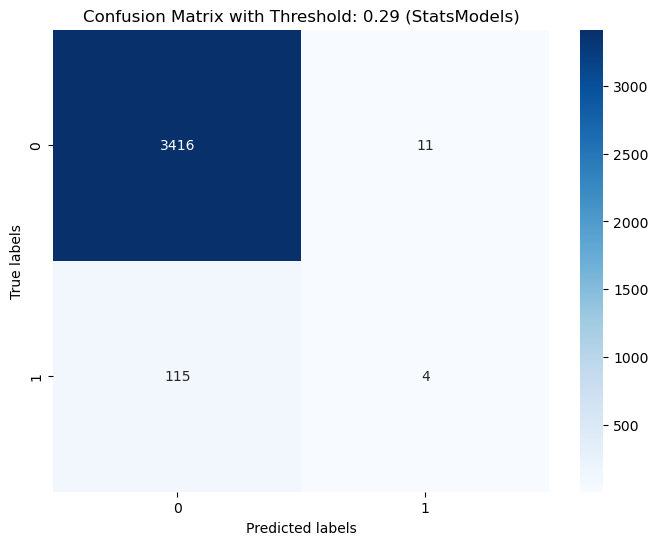

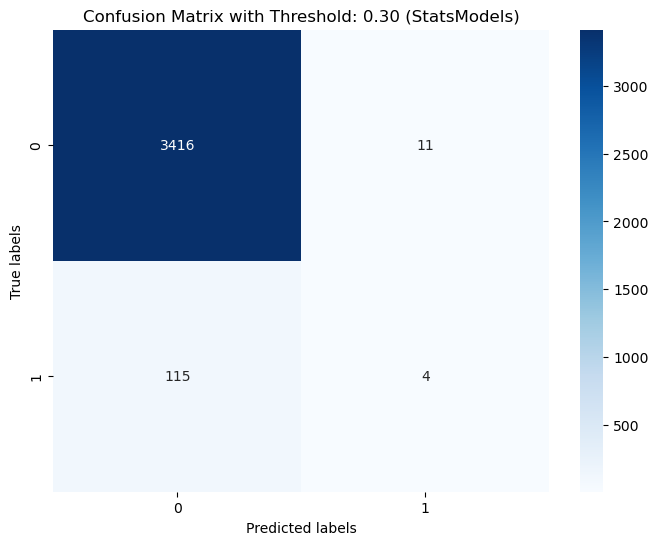

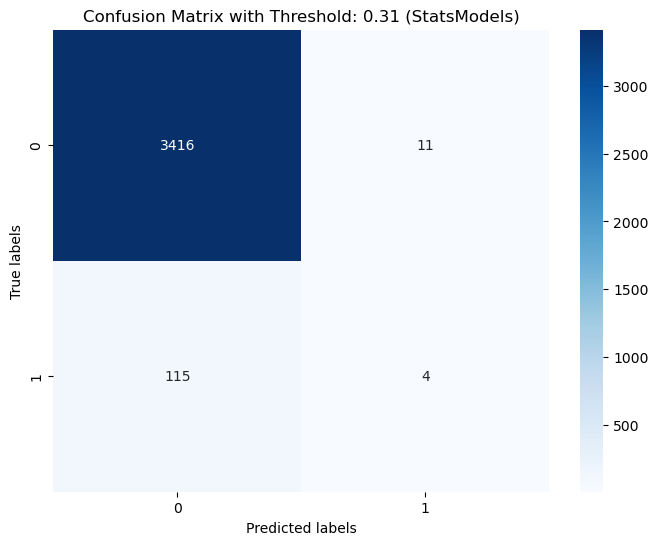

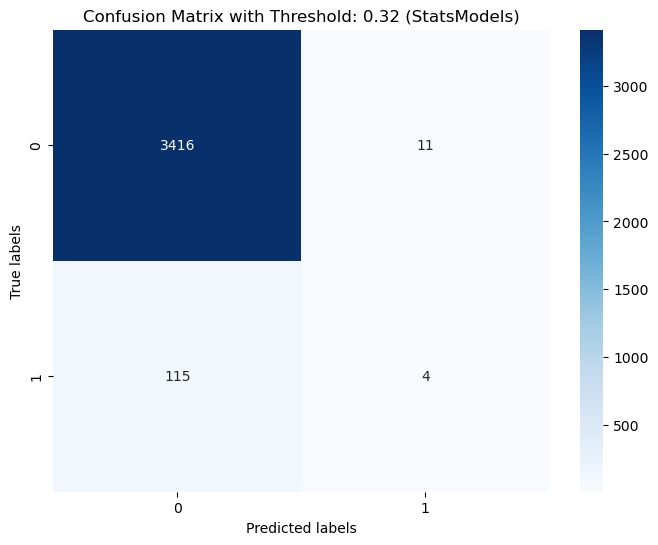

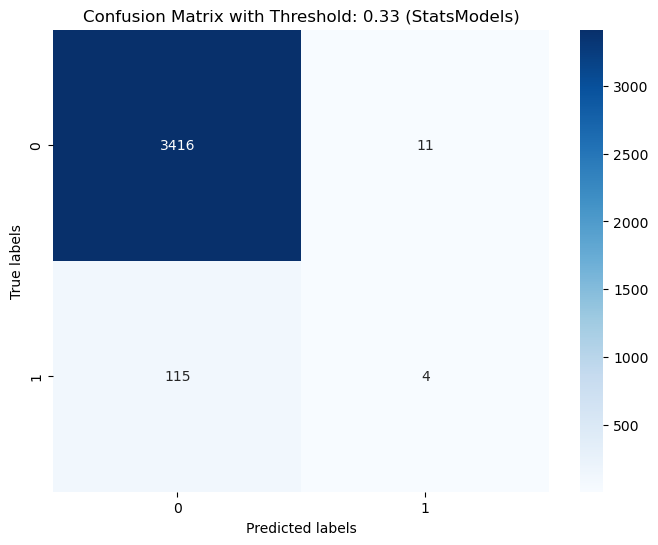

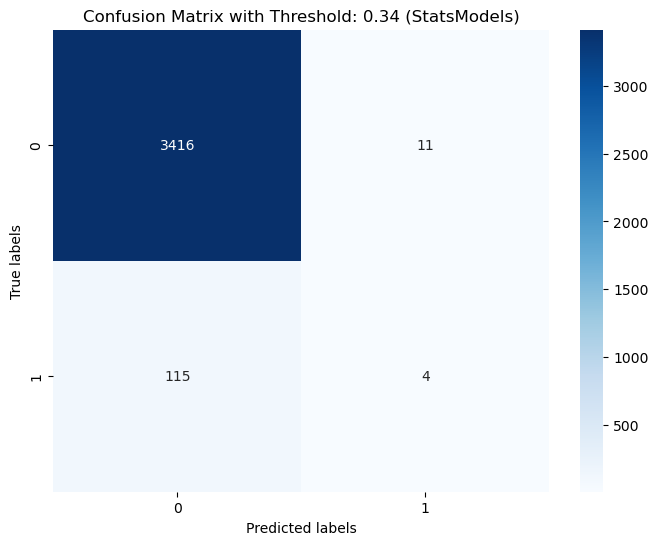

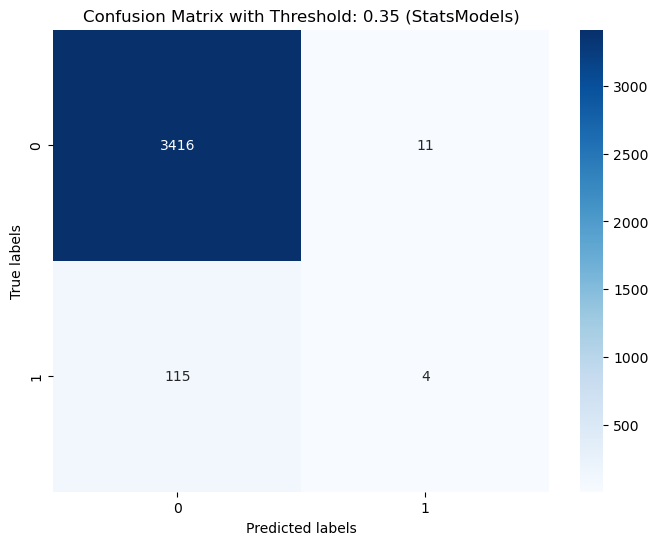

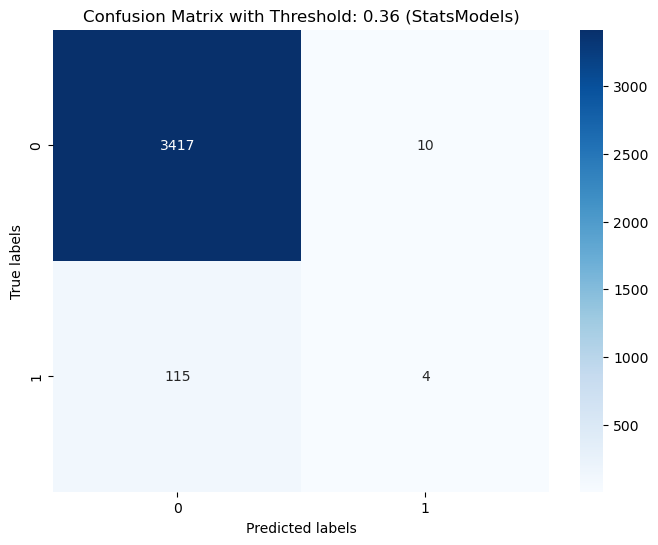

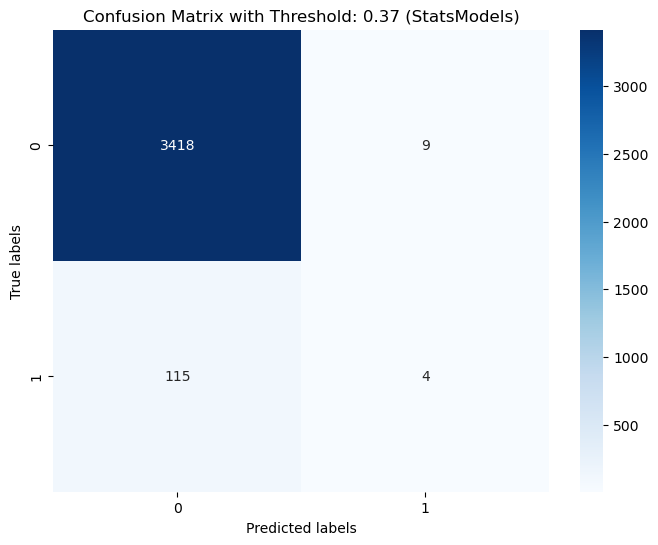

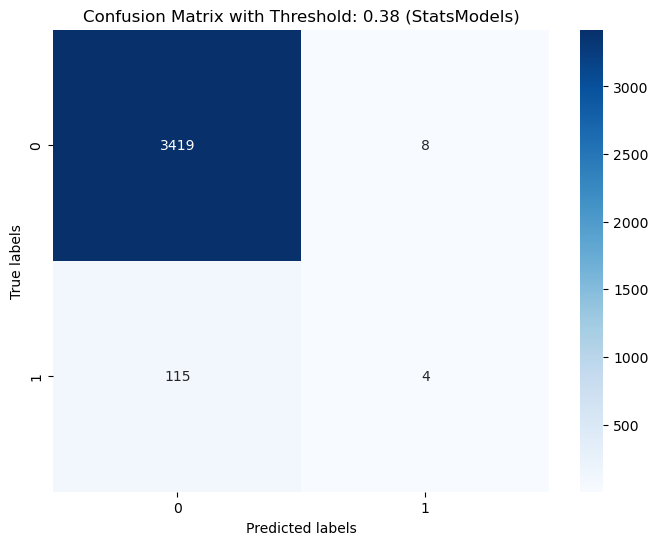

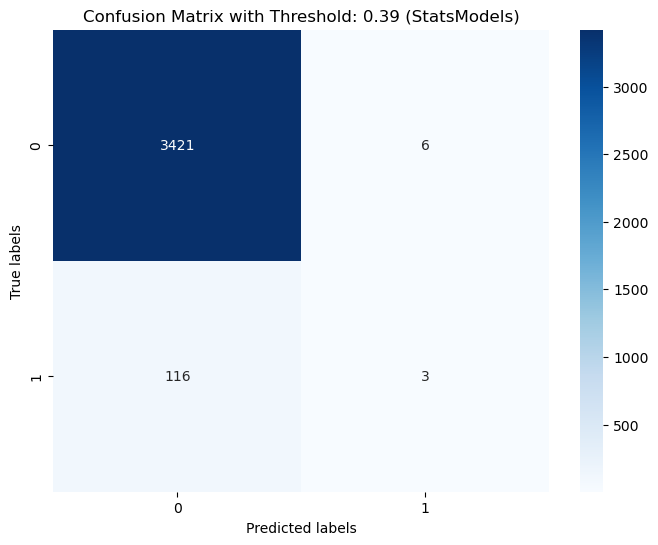

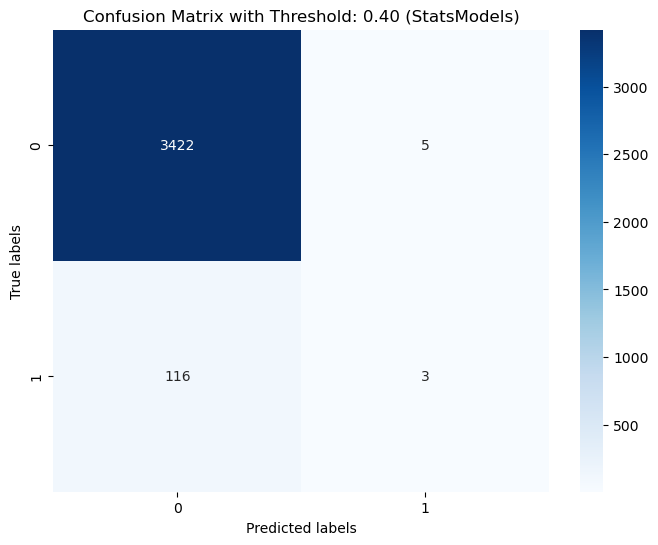

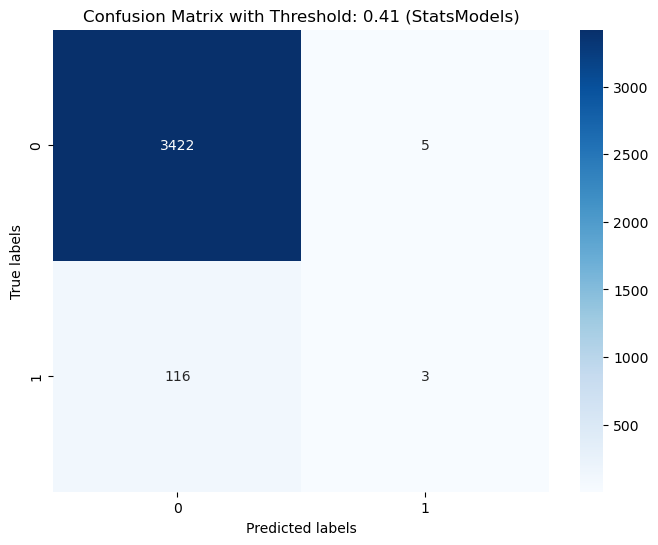

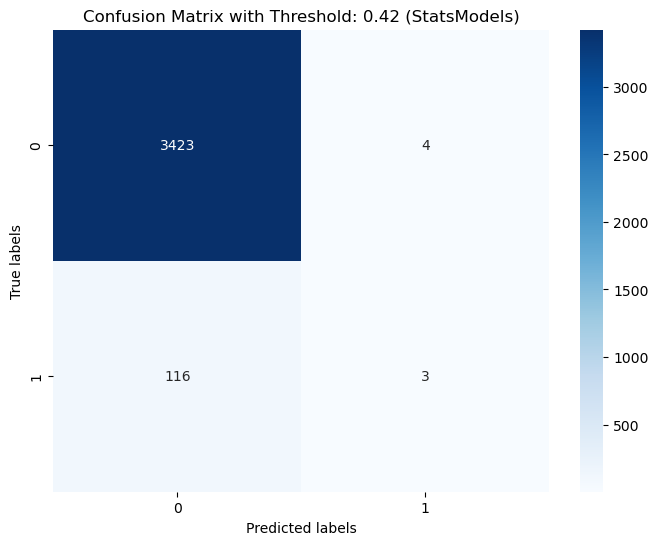

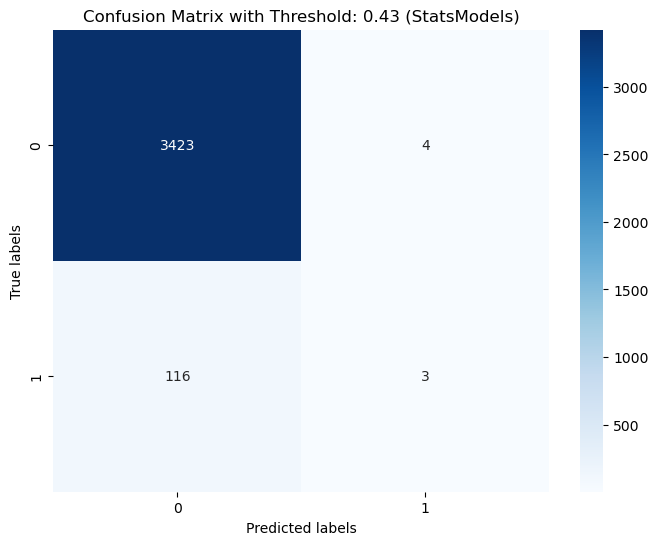

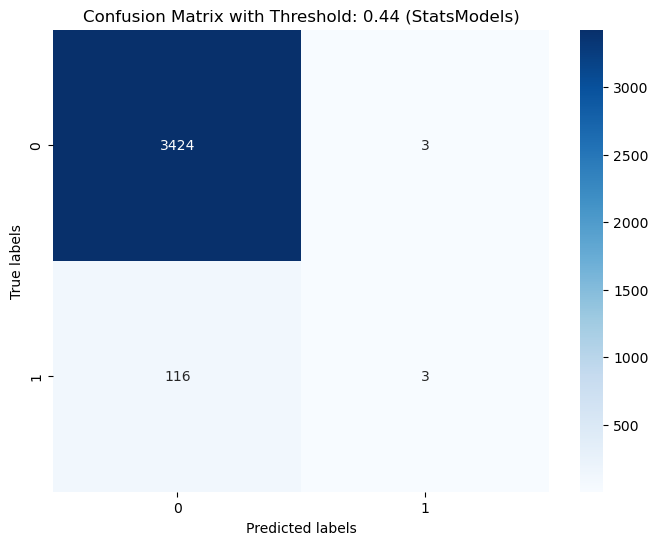

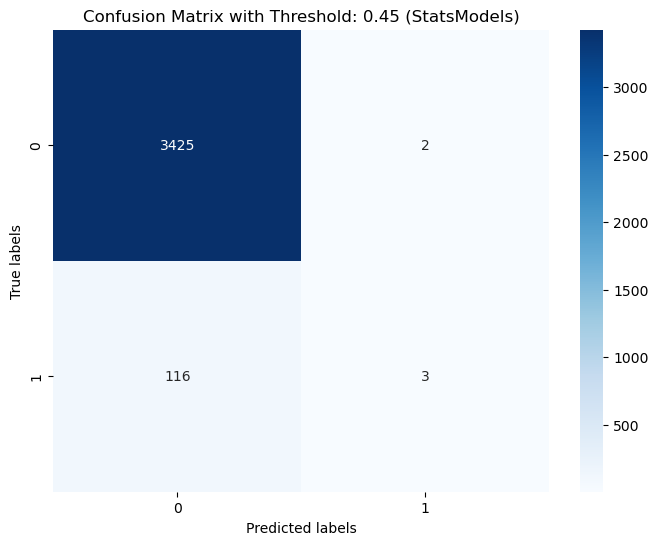

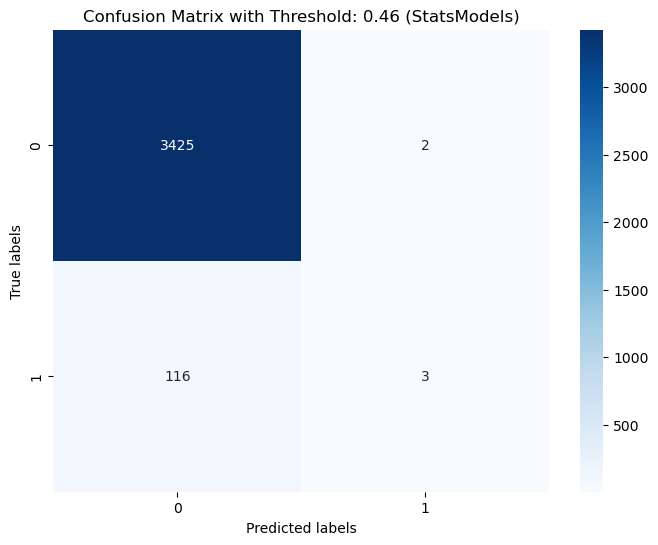

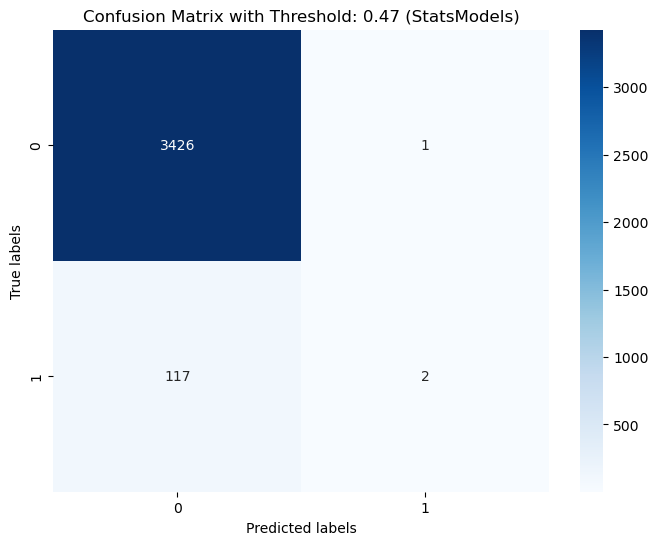

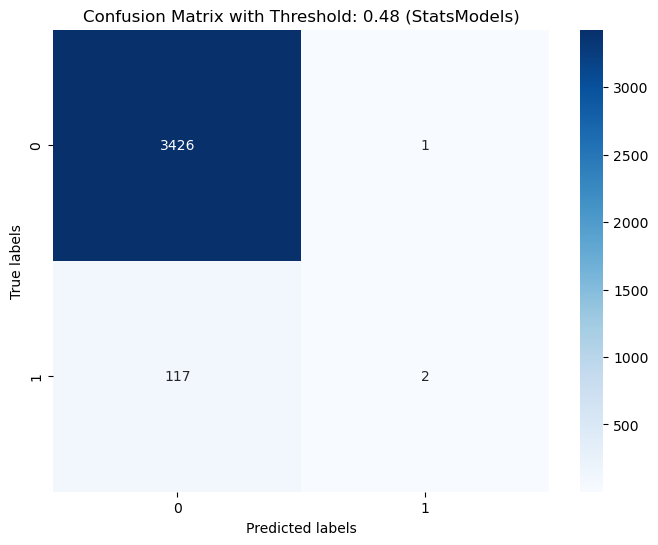

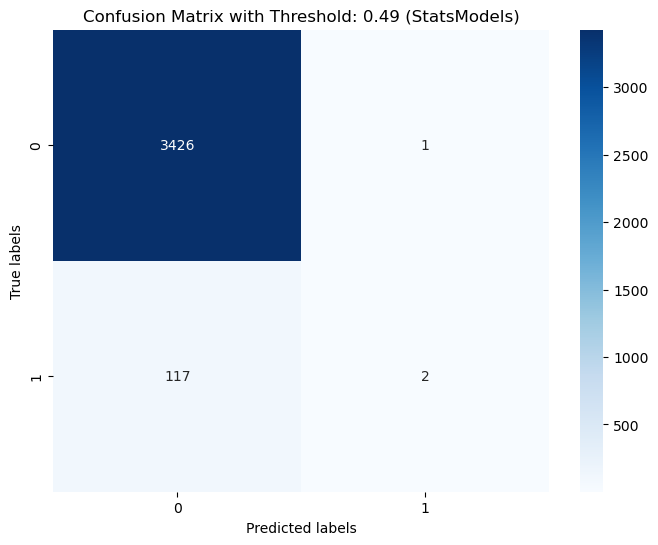

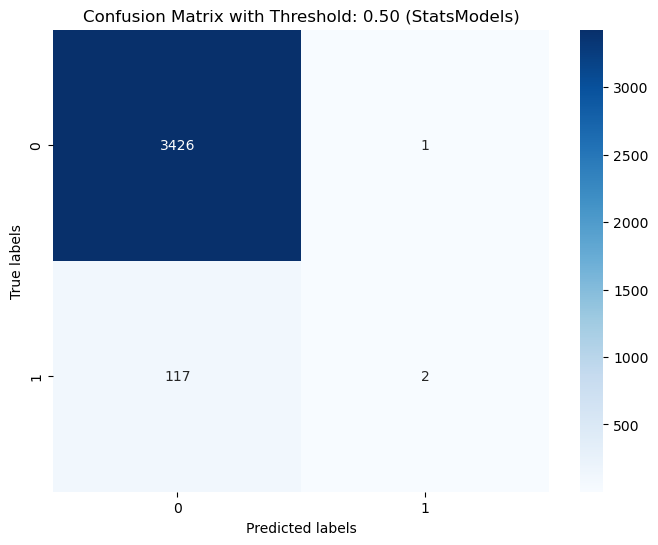

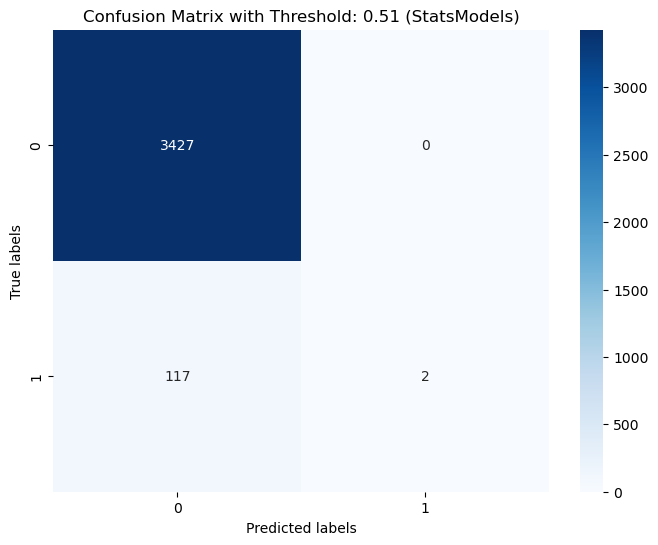

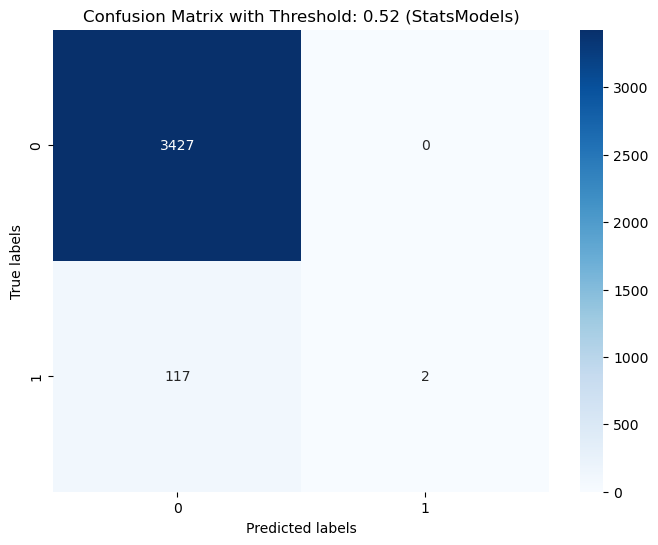

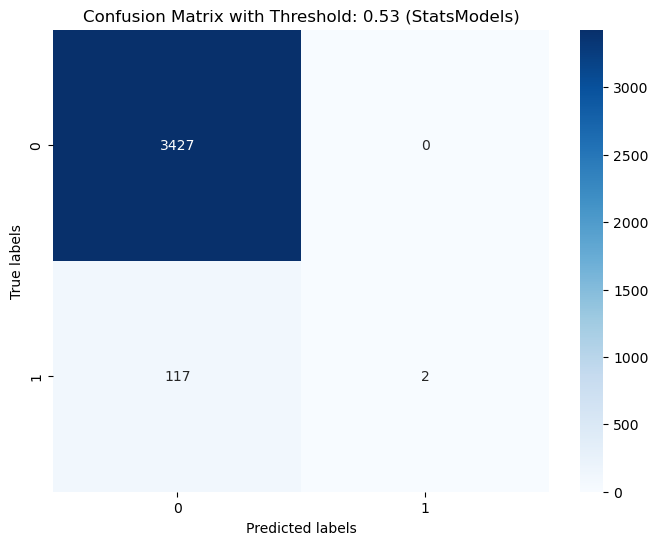

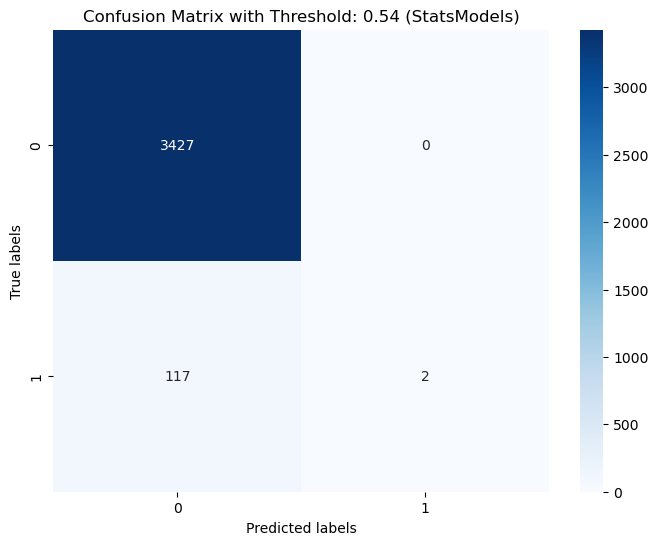

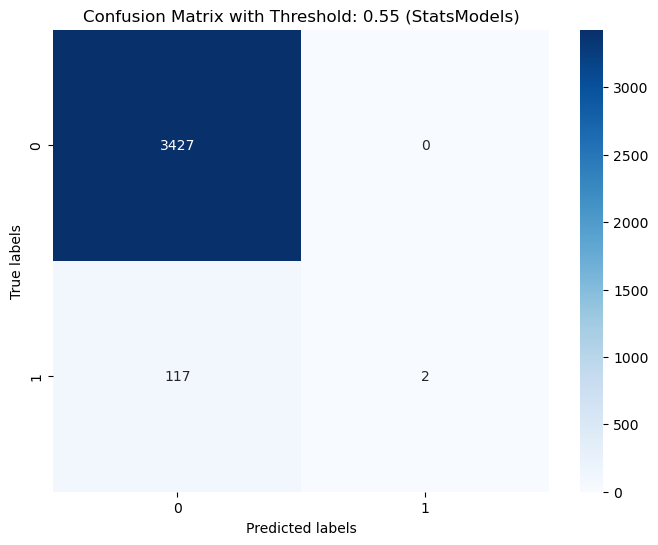

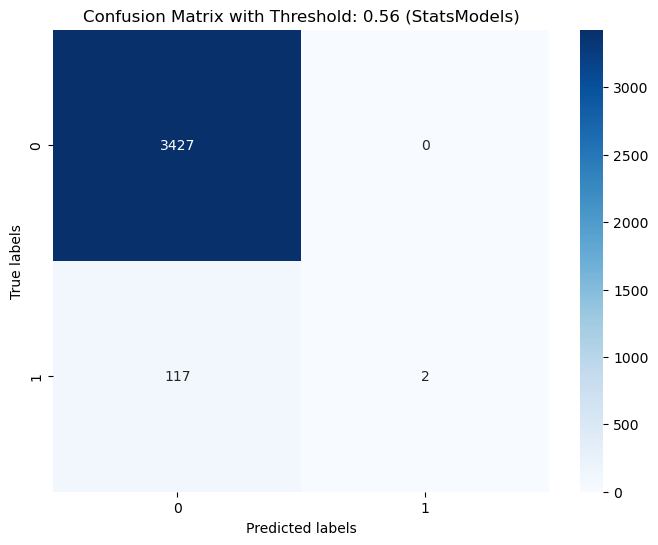

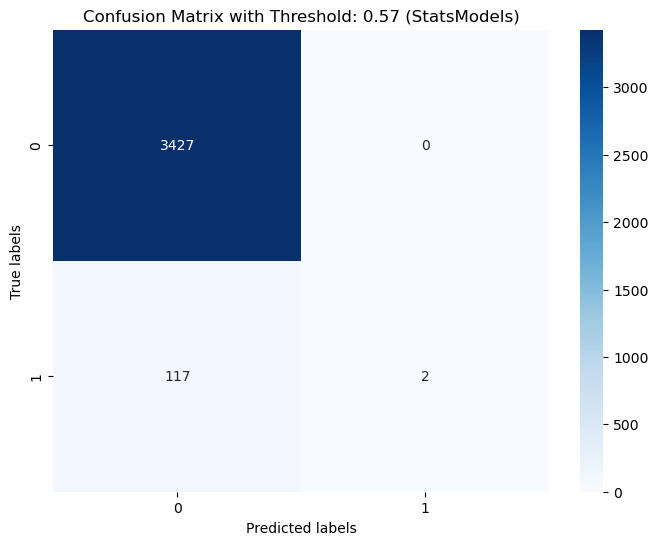

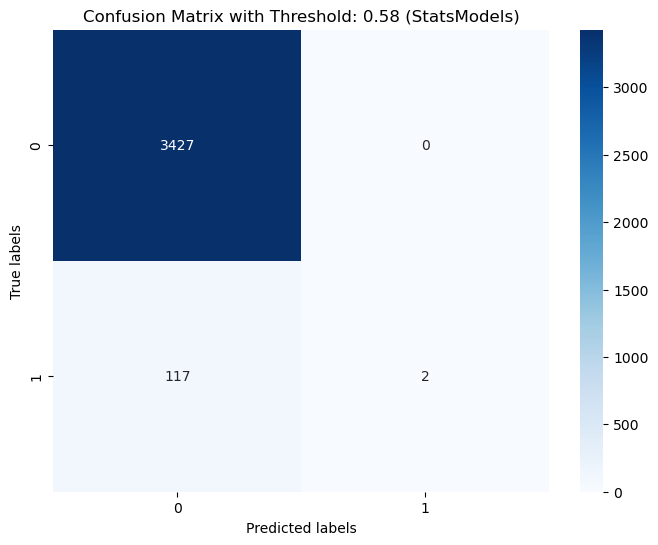

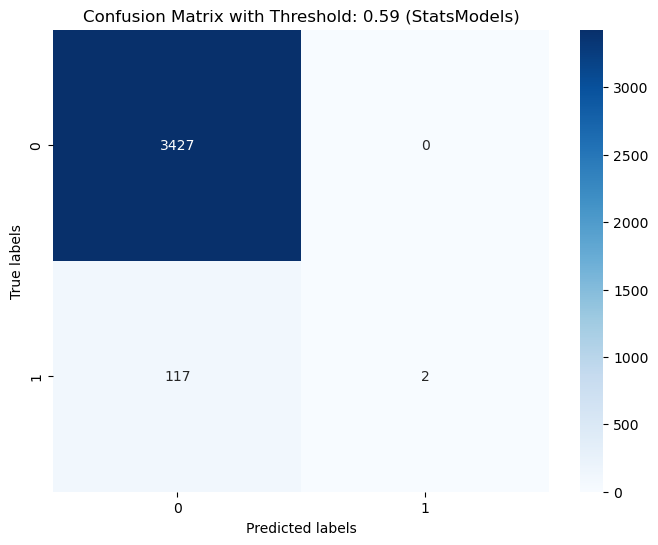

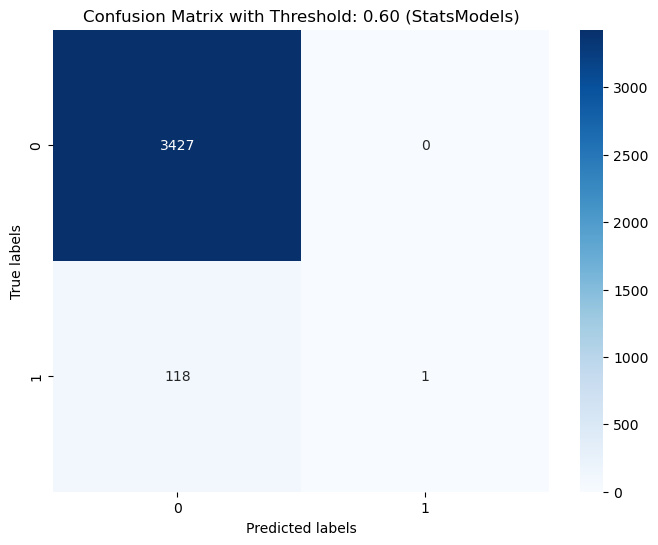

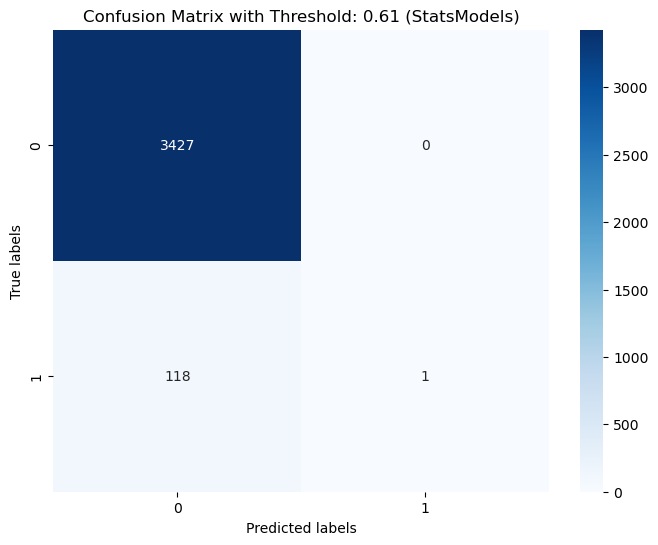

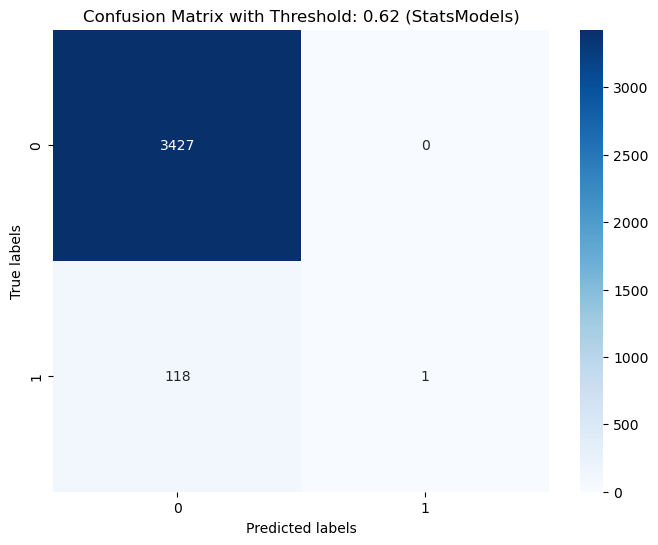

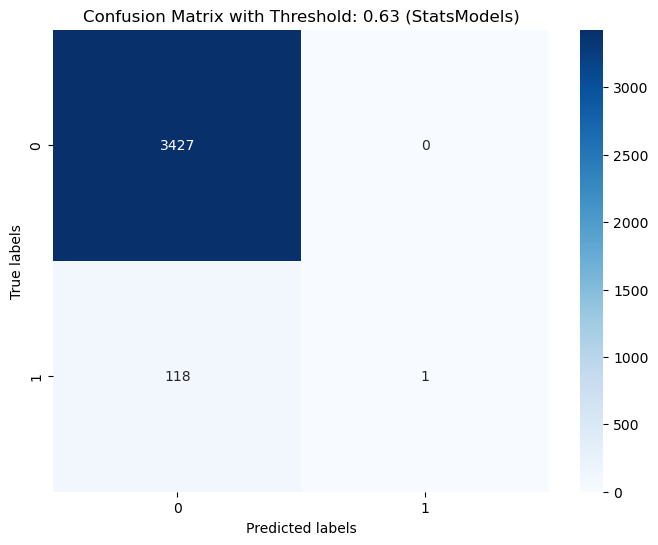

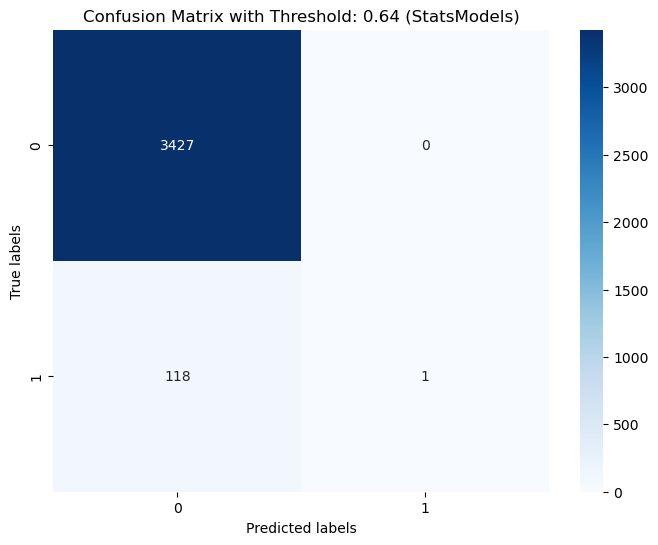

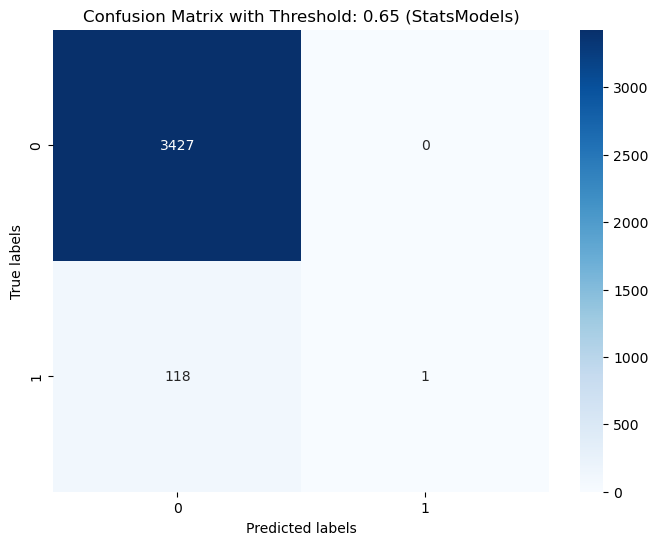

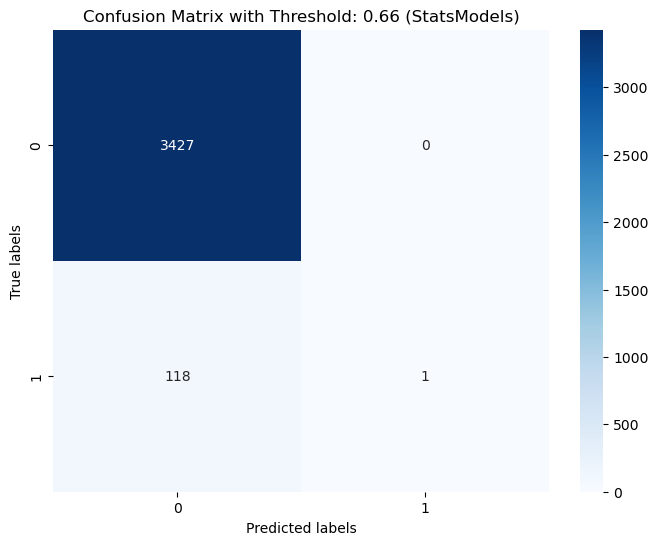

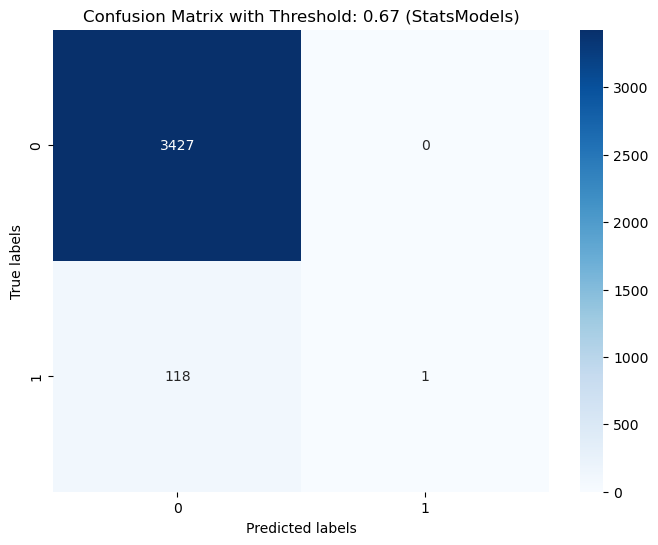

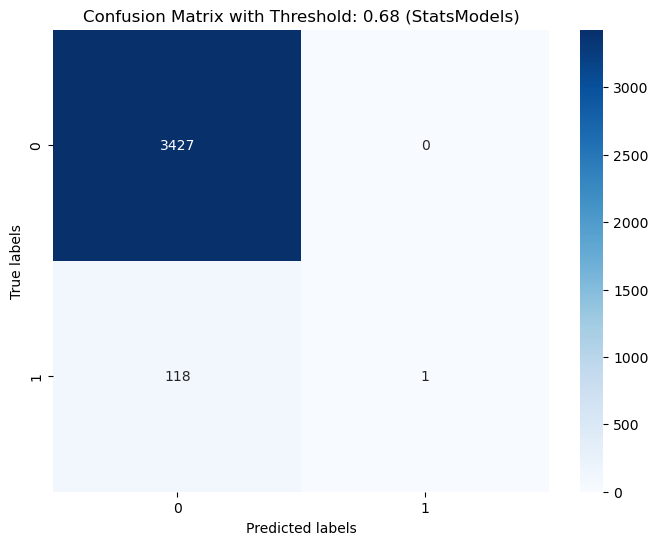

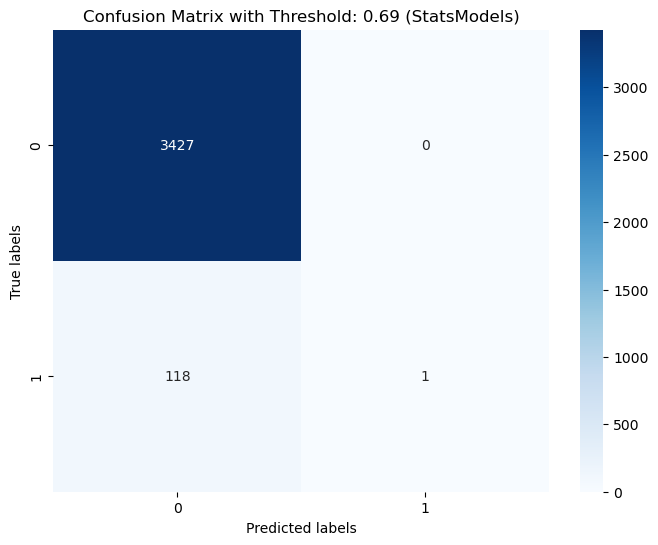

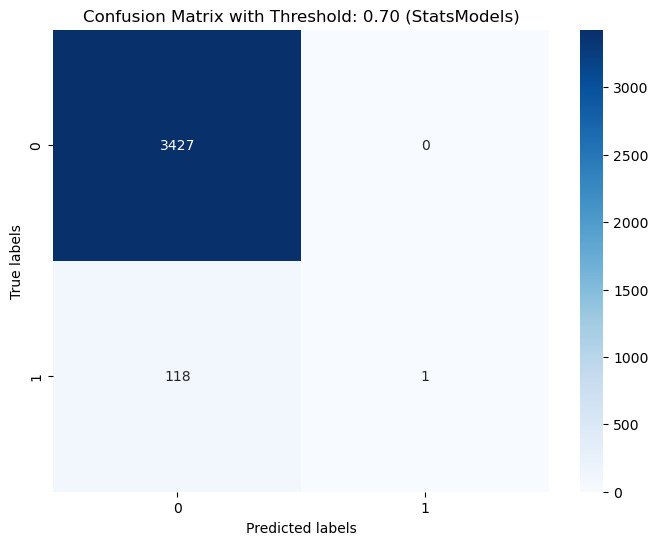

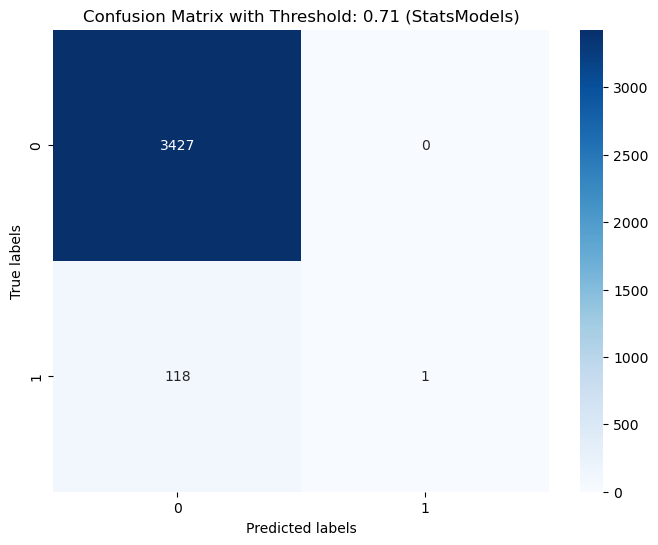

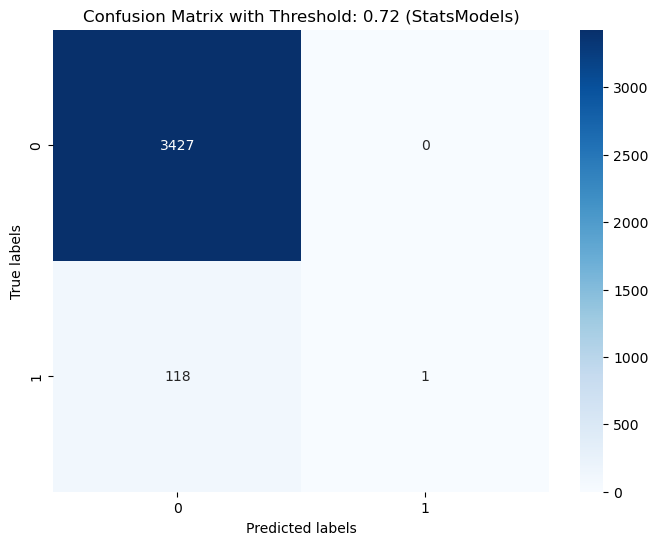

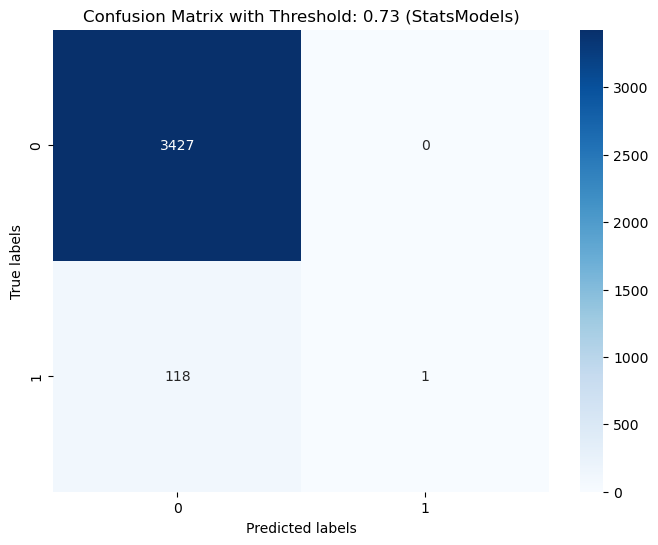

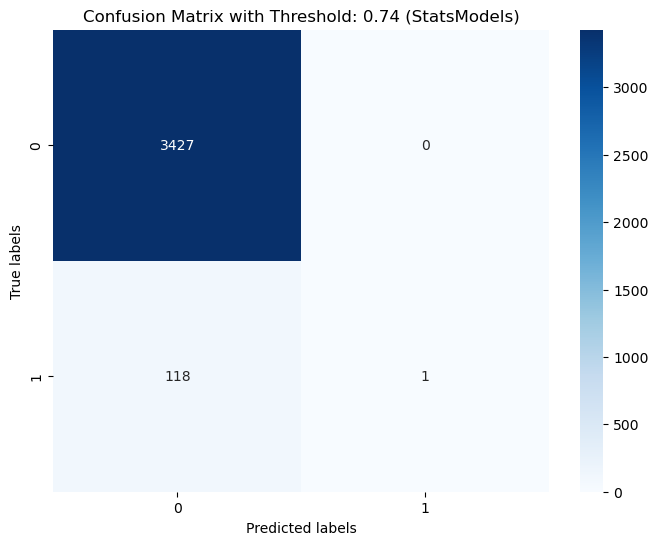

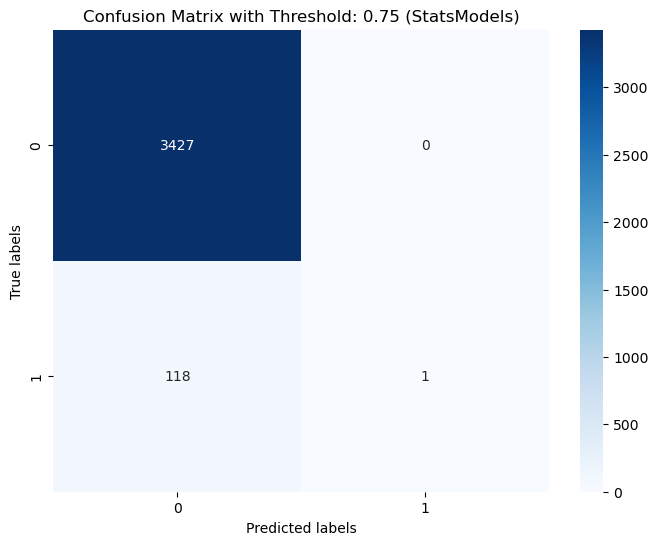

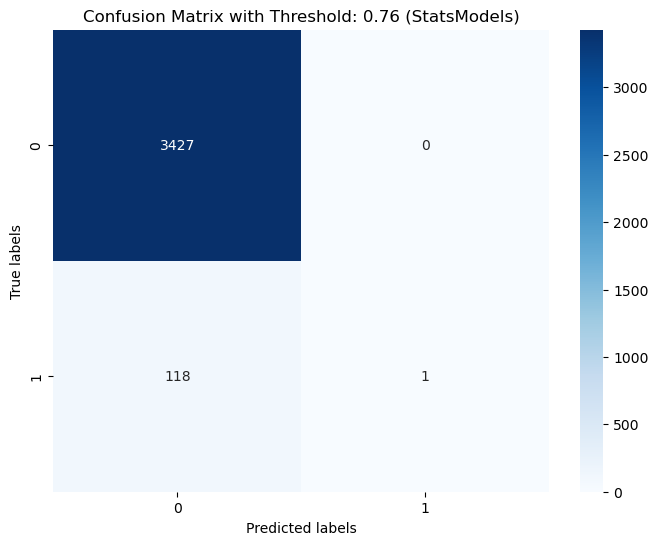

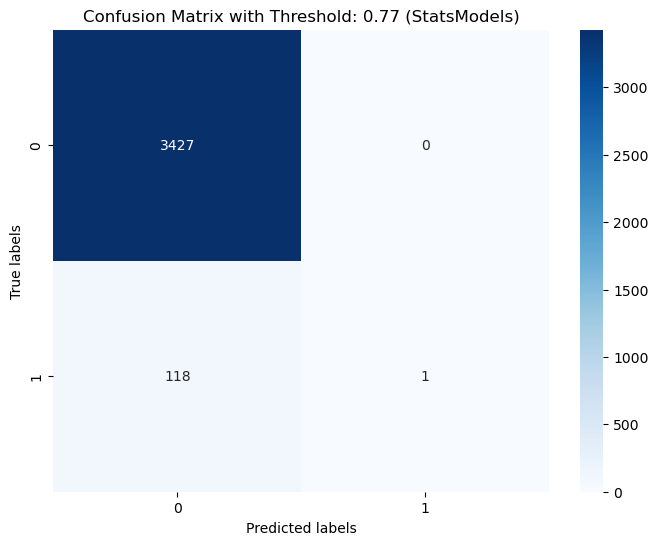

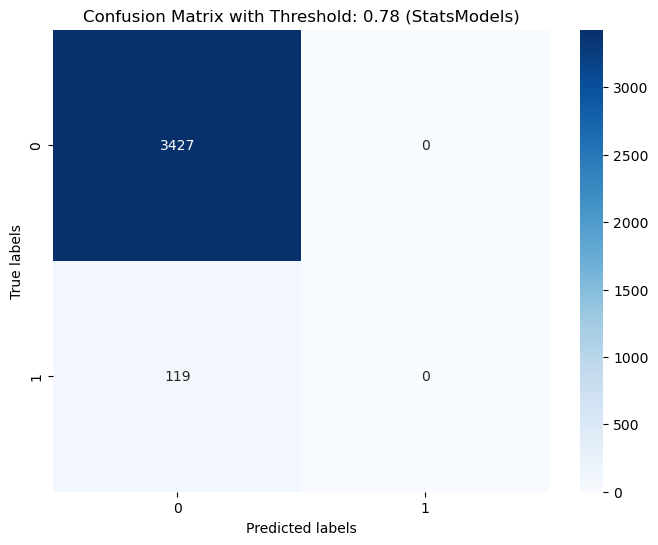

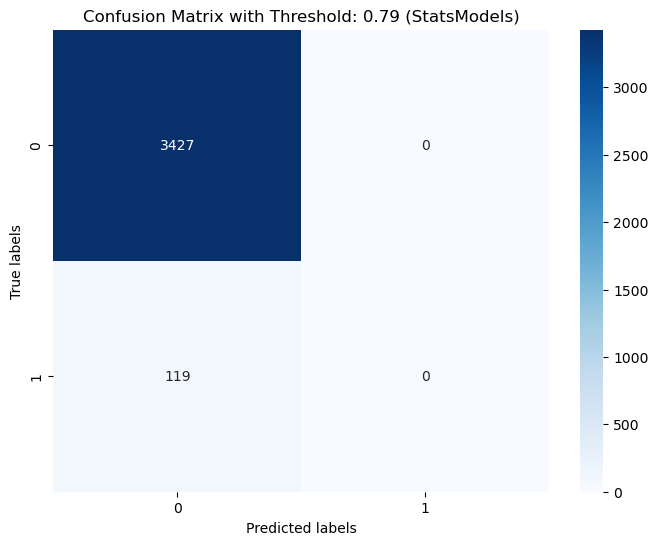

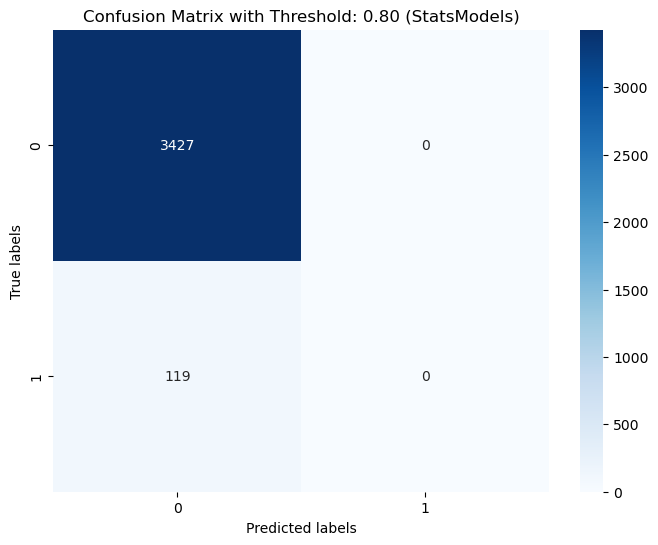

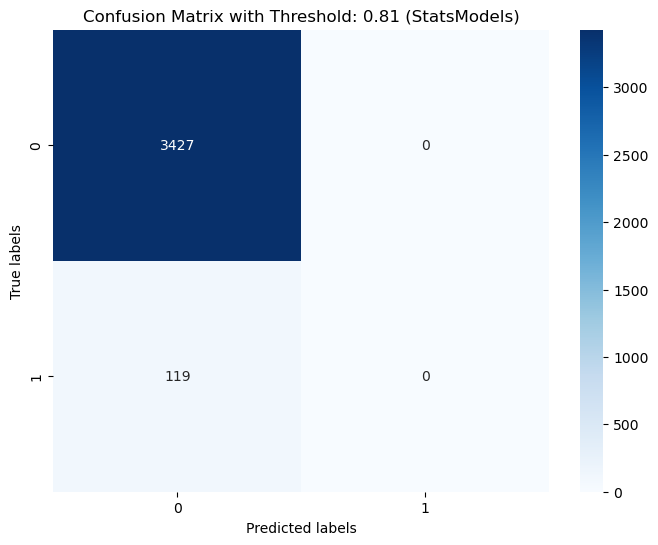

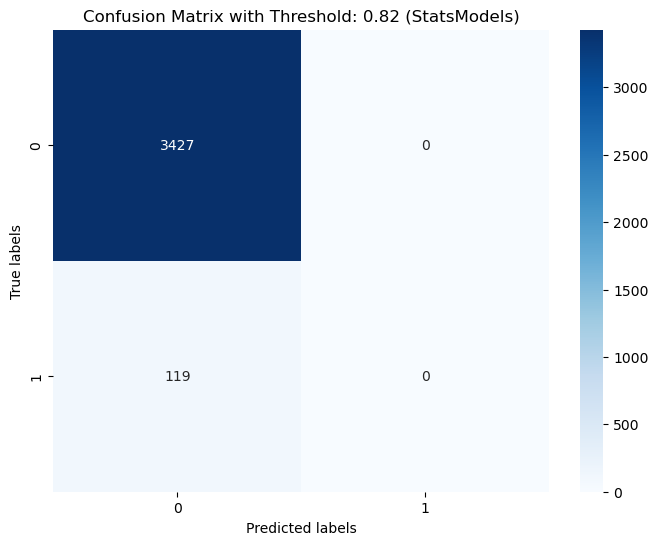

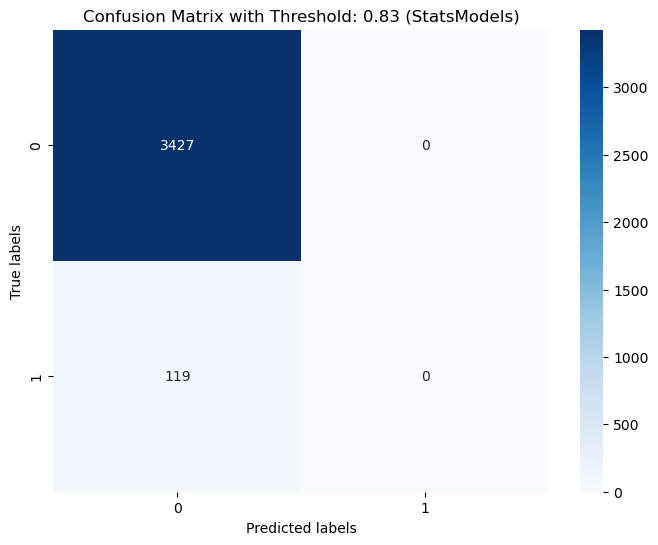

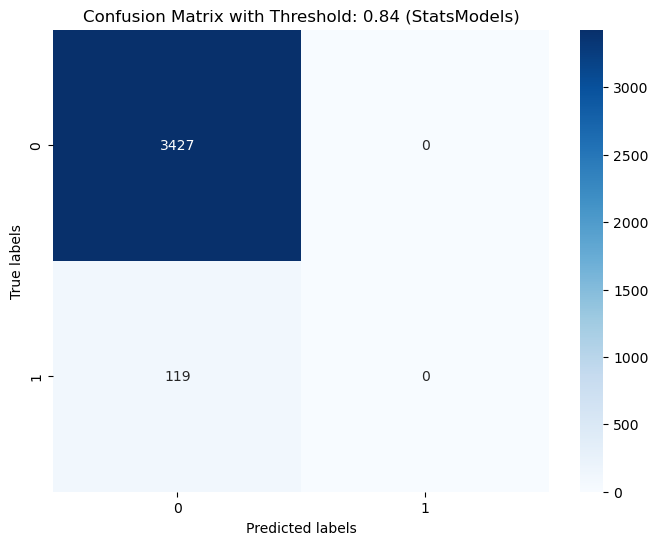

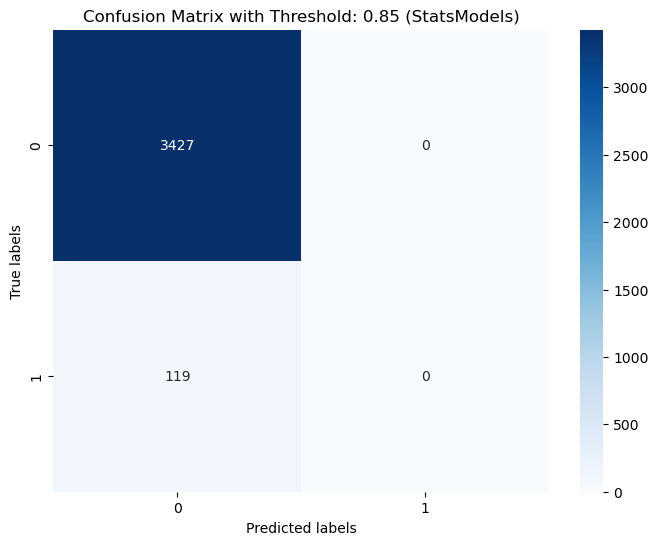

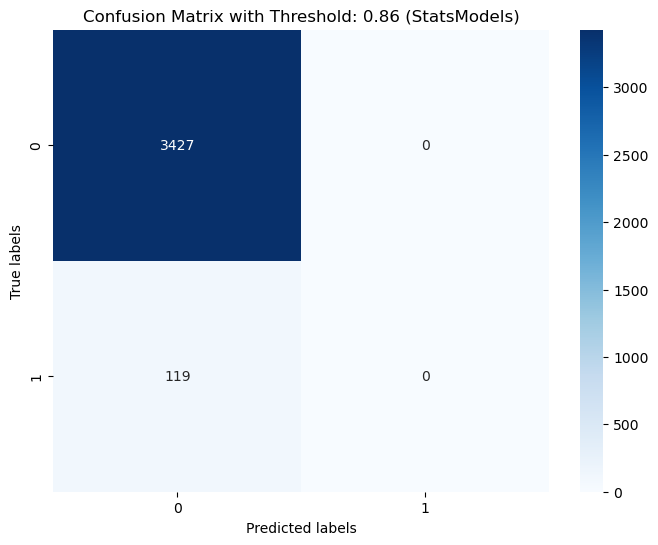

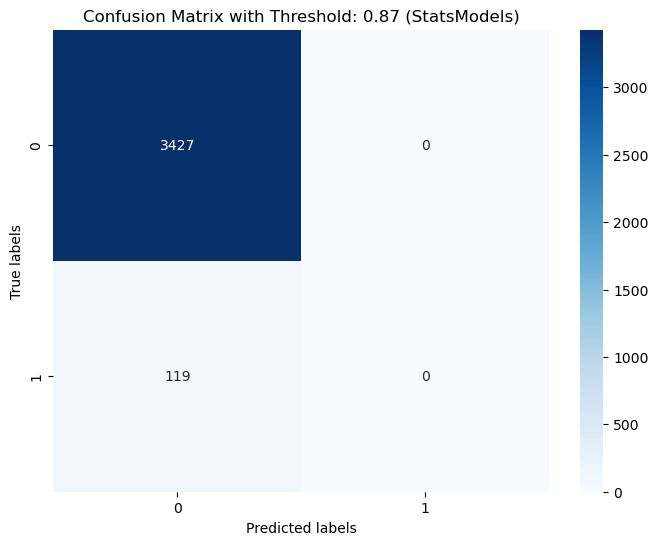

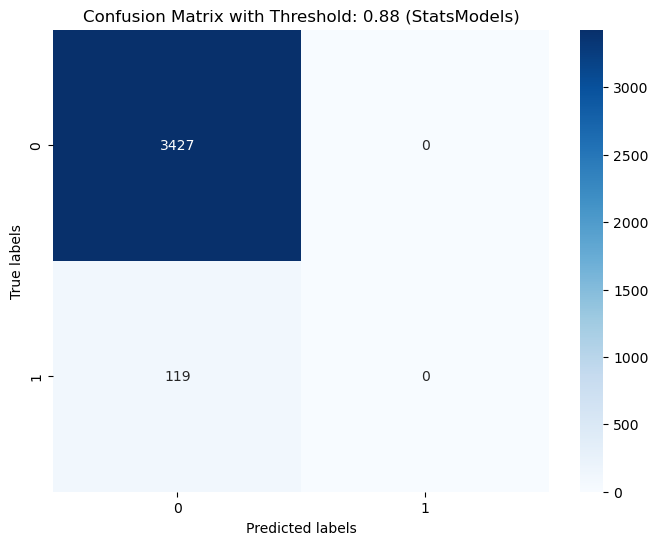

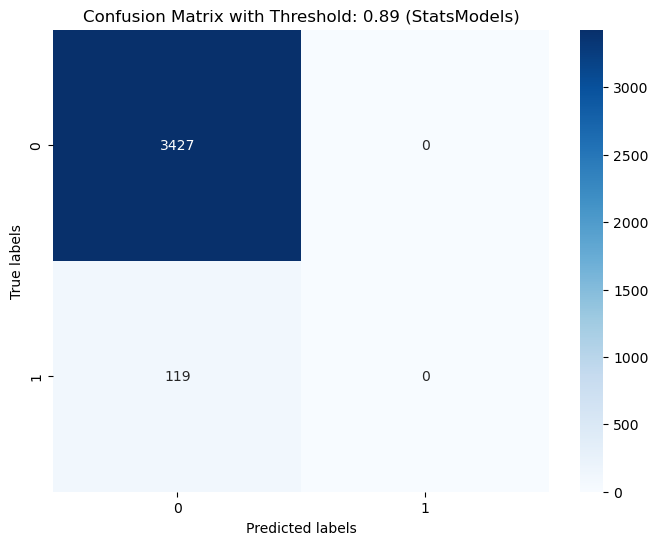

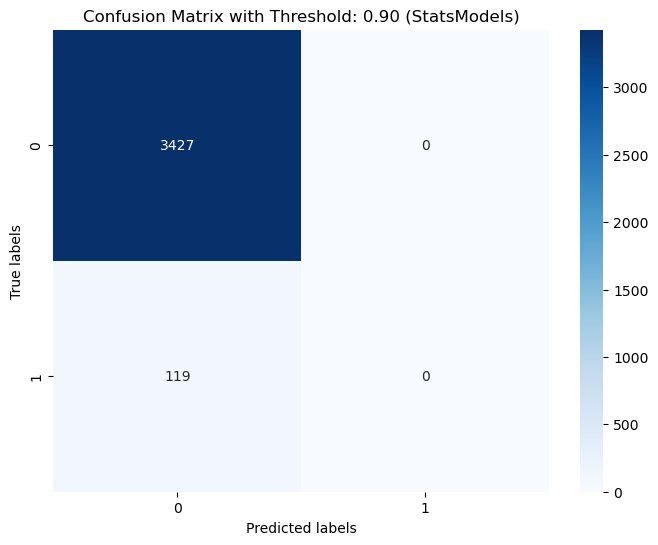

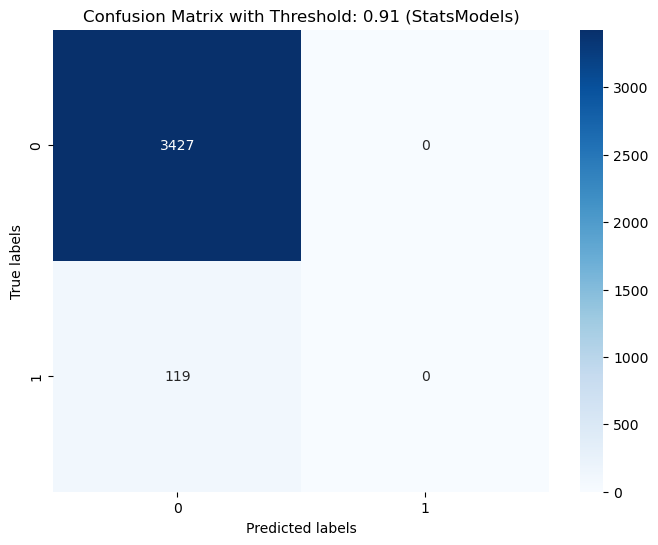

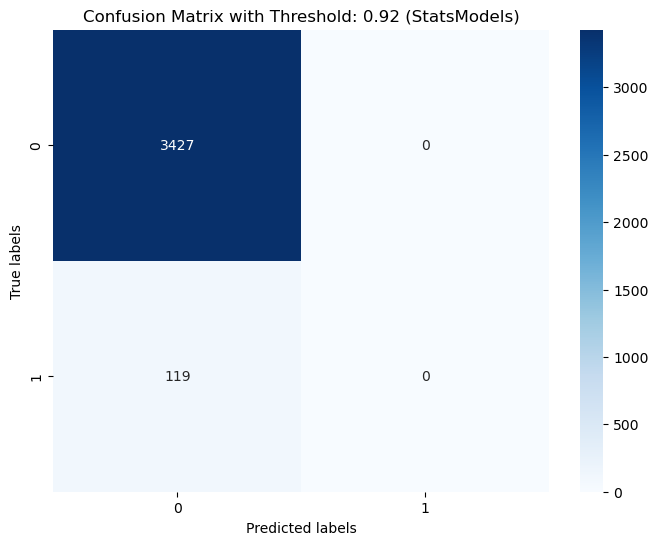

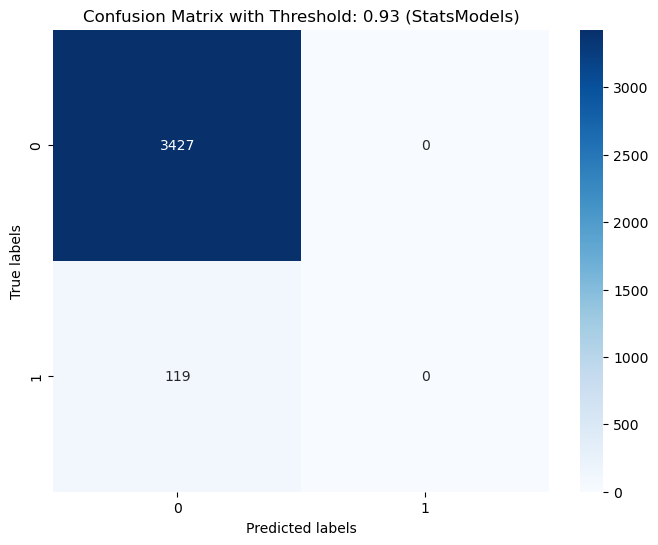

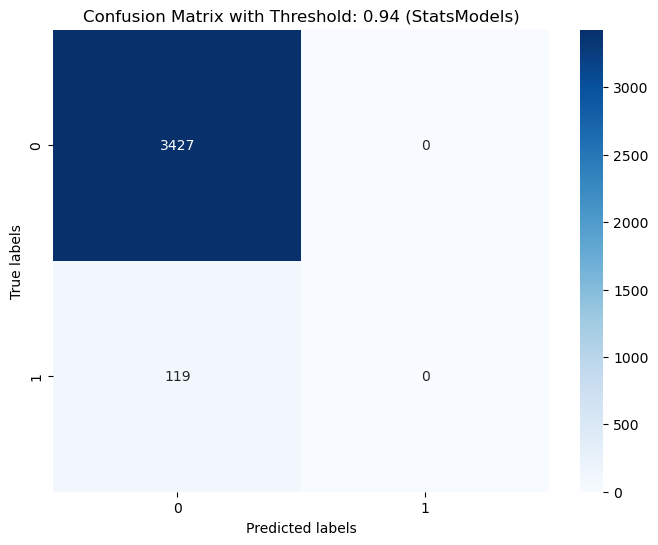

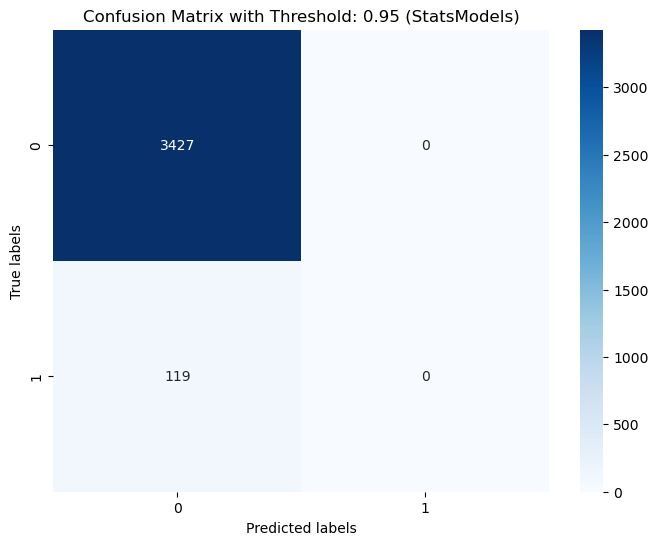

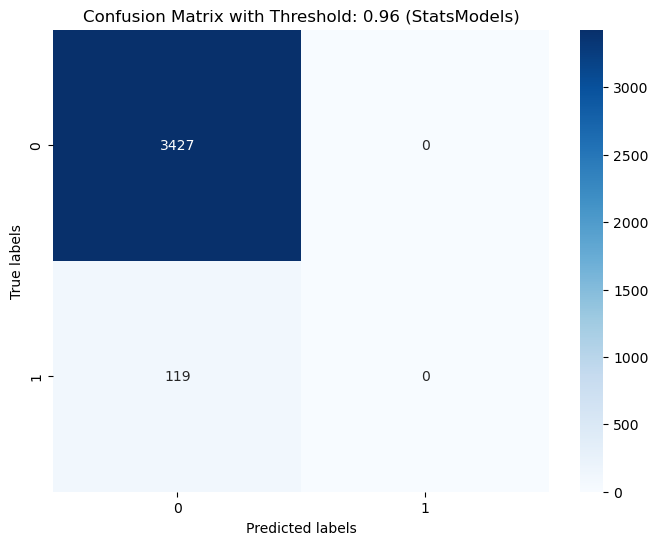

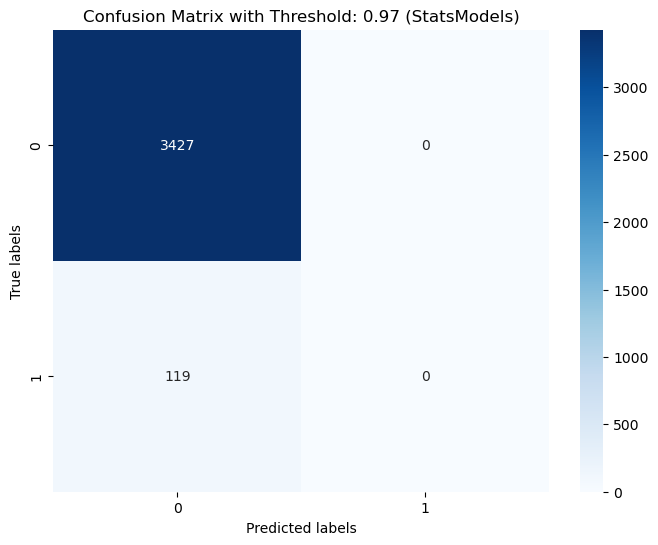

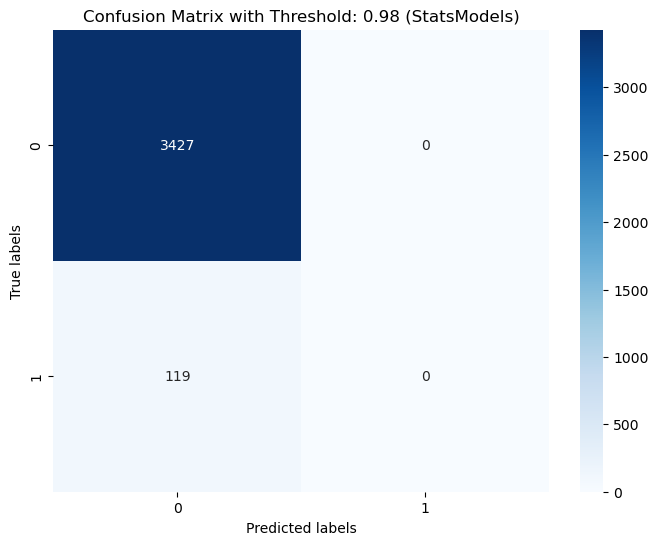

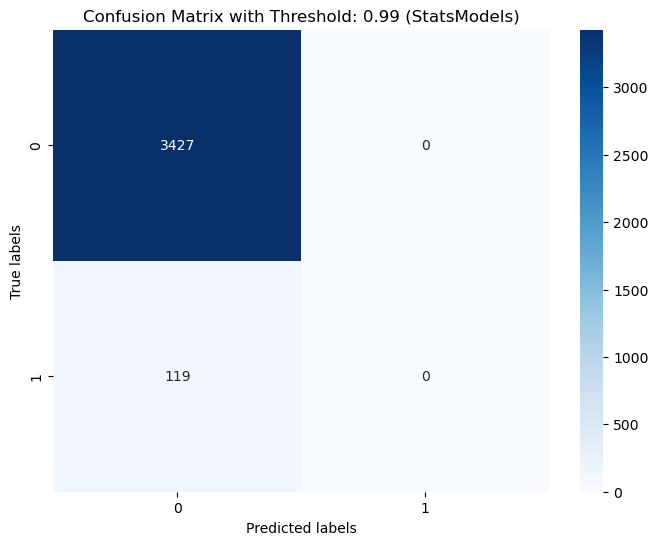

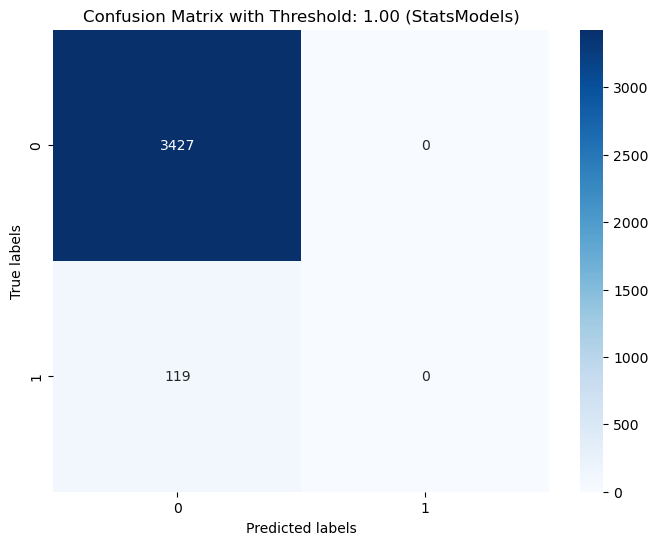

In [8]:
y_proba_sm = model_sm.predict(X_test_sm)

# Definiowanie różnych progów
thresholds = np.arange(0.01, 1.01, 0.01)

# Iteracja przez progi i generowanie macierzy pomyłek dla każdego progu
for threshold in thresholds:
    # Przypisanie nowych etykiet na podstawie progu
    y_pred_custom_threshold_sm = np.where(y_proba_sm >= threshold, 1, 0)
    
    # Generowanie macierzy pomyłek
    conf_matrix_custom_threshold_sm = confusion_matrix(y_test, y_pred_custom_threshold_sm)
    
    # Wizualizacja macierzy pomyłek
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix_custom_threshold_sm, annot=True, cmap='Blues', fmt='g')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(f'Confusion Matrix with Threshold: {threshold:.2f} (StatsModels)')
    plt.show()


Models beetwen threshold 0,02 and 0,03 seem to be the best optimzed. Let's chceck a models beetwen this assumptions


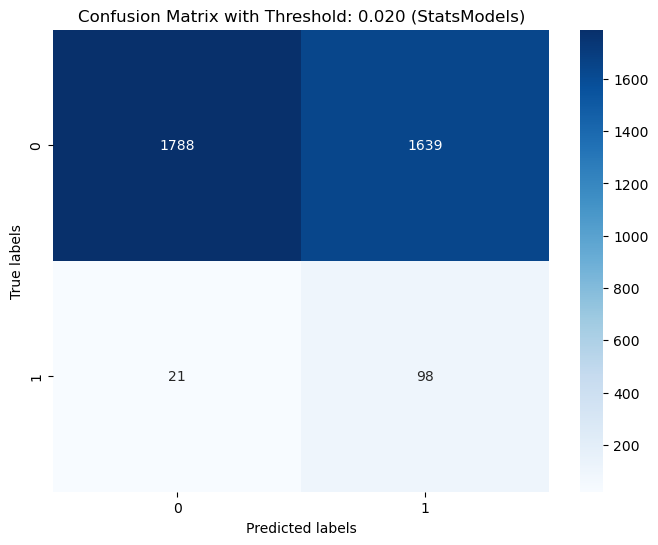

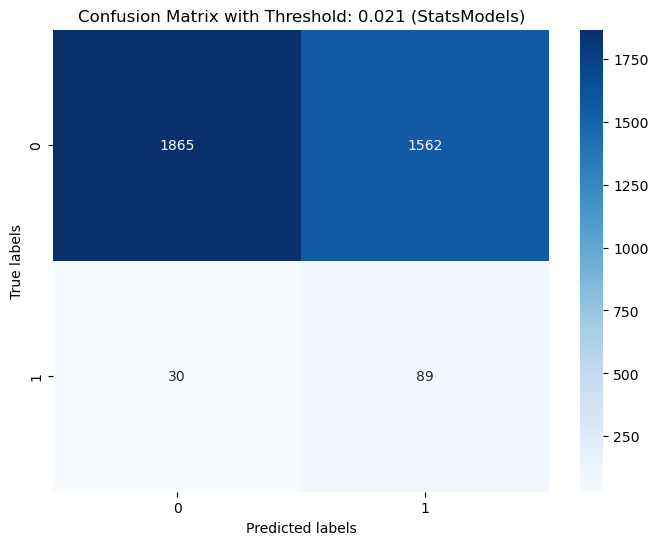

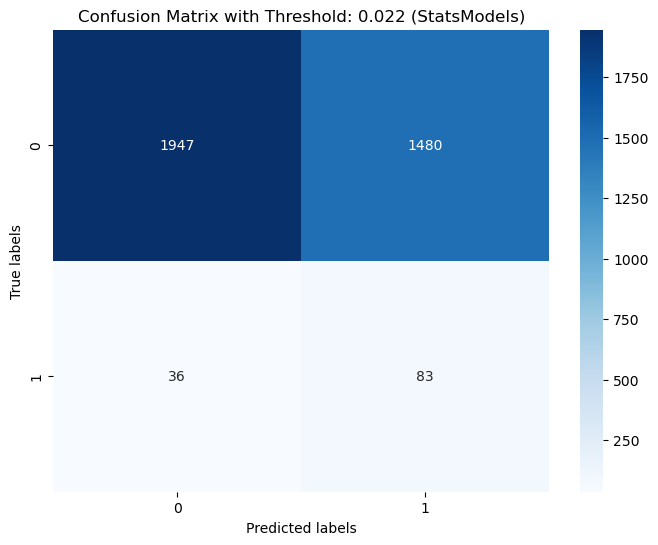

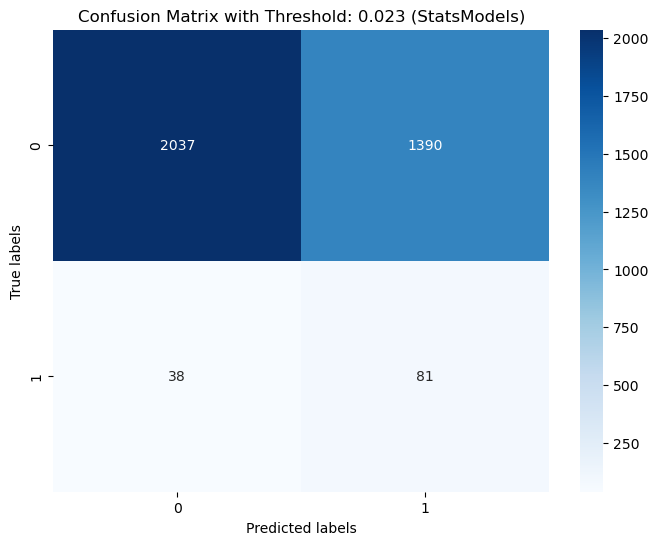

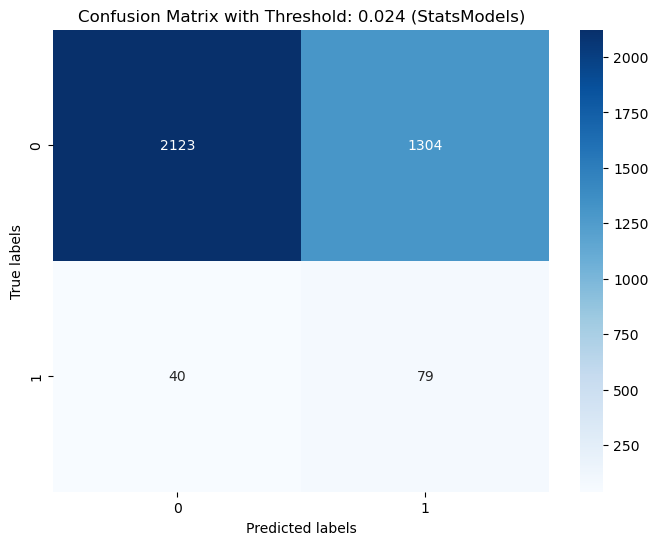

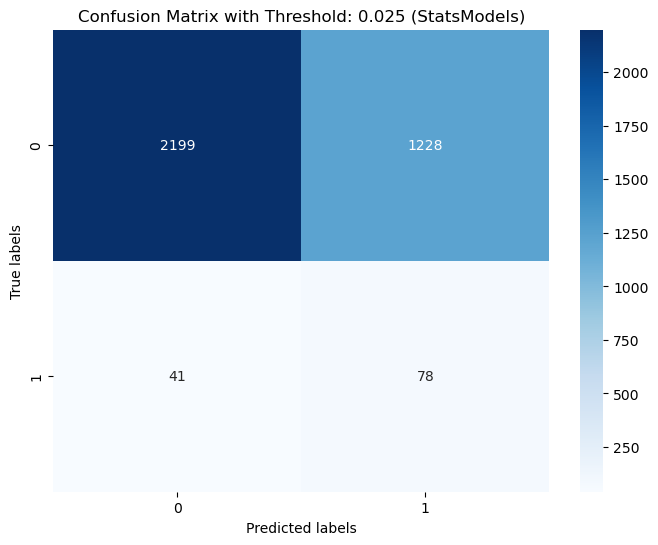

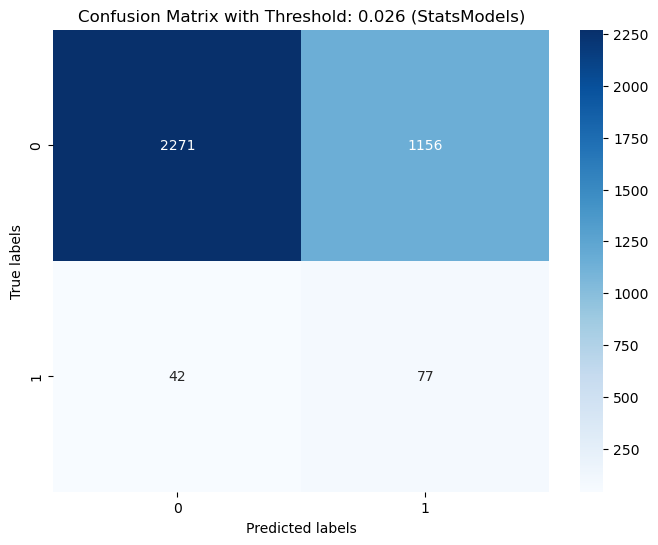

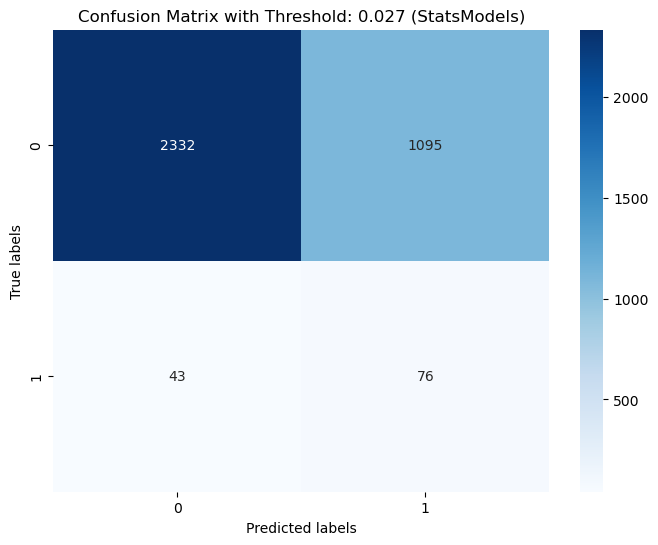

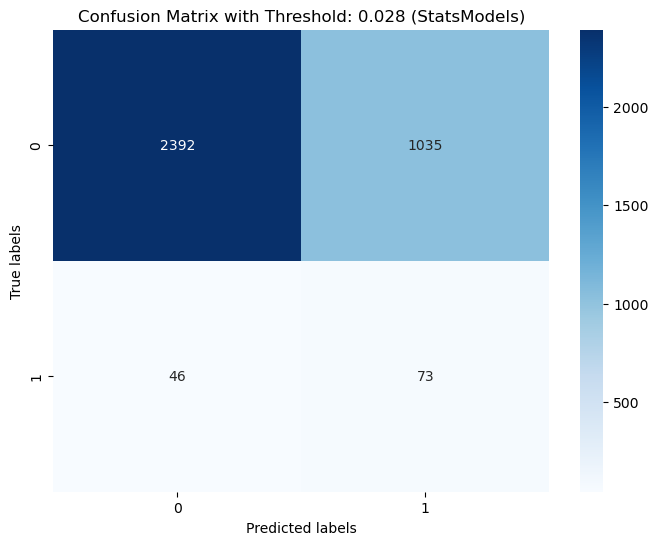

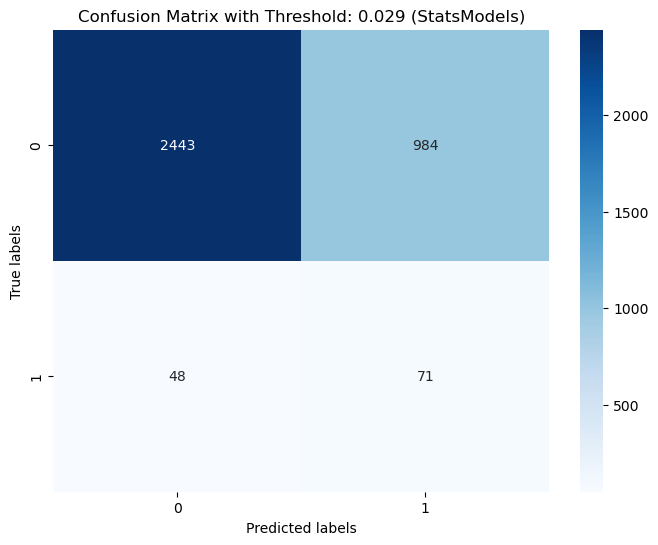

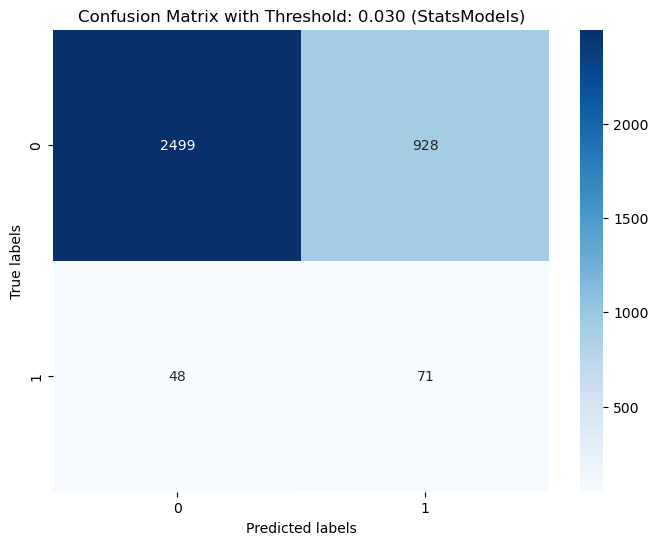

In [9]:
# Definiowanie nowego zakresu progów od 0.02 do 0.03 (włącznie) z krokiem 0.001
thresholds_fine = np.arange(0.02, 0.031, 0.001)

# Wydrukowanie wygenerowanych progów dla weryfikacji
thresholds_fine
for threshold in thresholds_fine:
    # Przypisanie nowych etykiet na podstawie progu
    y_pred_custom_threshold_sm = np.where(y_proba_sm >= threshold, 1, 0)
    
    # Generowanie macierzy pomyłek
    conf_matrix_custom_threshold_sm = confusion_matrix(y_test, y_pred_custom_threshold_sm)
    
    # Wizualizacja macierzy pomyłek
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix_custom_threshold_sm, annot=True, cmap='Blues', fmt='g')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(f'Confusion Matrix with Threshold: {threshold:.3f} (StatsModels)')
    plt.show()

We choose logit regresion with threshold 0.024 as a compare point to build model. New logit must be at least similar, if not better. 

Optimization terminated successfully.
         Current function value: 0.119968
         Iterations 8


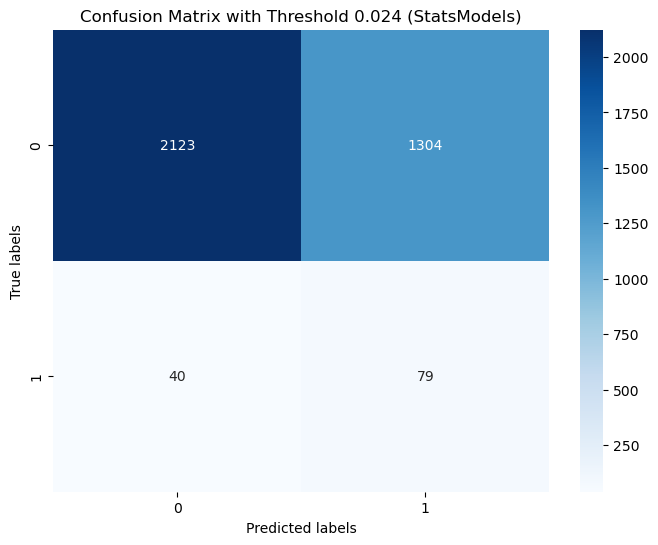

Accuracy: 0.6210
Precision: 0.0571
Recall: 0.6639
F1 Score: 0.1052


In [10]:
# Create a start model: simple logit with all variables, for which threshold is equal to 0,024
model_sm = sm.Logit(y_train_sm, X_train_sm).fit()

# Przewidywanie prawdopodobieństw dla danych testowych (bez zmian)
X_test_sm = sm.add_constant(X_test)
y_pred_prob_sm = model_sm.predict(X_test_sm)

# Zamiana prawdopodobieństw na etykiety klasy na podstawie progu 0.03
y_pred_sm = (y_pred_prob_sm >= 0.024).astype(int)

# Generowanie macierzy pomyłek
conf_matrix_sm = confusion_matrix(y_test, y_pred_sm)

# Wizualizacja macierzy pomyłek
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_sm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix with Threshold 0.024 (StatsModels)')
plt.show()
accuracy = accuracy_score(y_test, y_pred_sm)
precision = precision_score(y_test, y_pred_sm)
recall = recall_score(y_test, y_pred_sm)
f1 = f1_score(y_test, y_pred_sm)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


AUC: 0.7238
Gini Coefficient: 0.4477


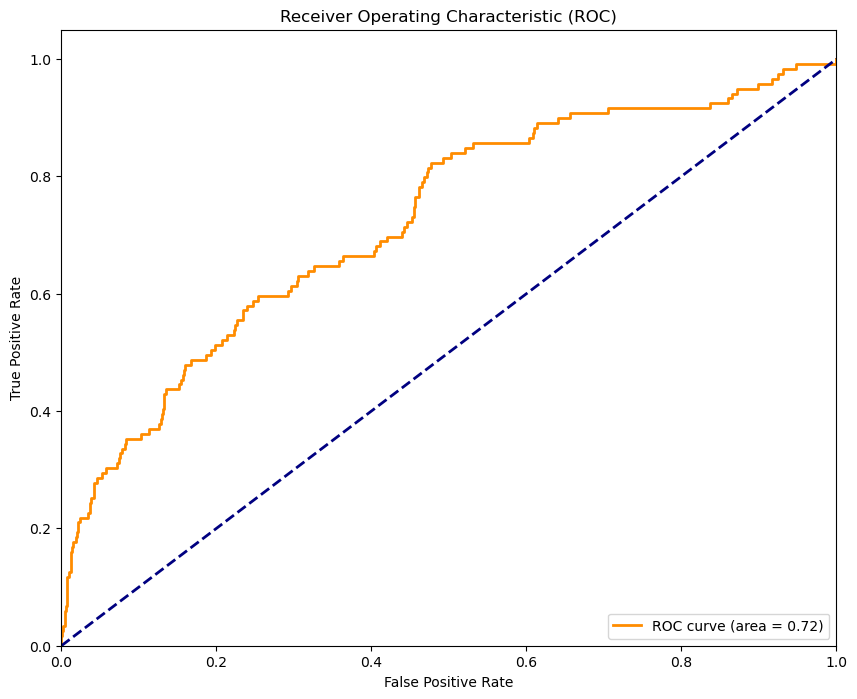

In [19]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Już obliczone AUC i Gini
auc = roc_auc_score(y_test, y_pred_prob_sm)
gini = 2 * auc - 1

print(f"AUC: {auc:.4f}")
print(f"Gini Coefficient: {gini:.4f}")

# Generowanie współczynników dla krzywej ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_sm)

# Rysowanie krzywej ROC
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {auc:.2f})')  # Używam już obliczonej wartości AUC
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()



In [11]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Inicjalizacja modelu regresji logistycznej
model = LogisticRegression()

# RFE
rfe = RFE(estimator=model, n_features_to_select=1)
rfe = rfe.fit(X_train_sm, y_train_sm)

# Ranking cech
print('Ranking cech:', rfe.ranking_)


c:\Users\jansl\.conda\envs\Spyder\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\jansl\.conda\envs\Spyder\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

Ranking cech: [13 21 14 27 26 30  8 12 24  7  2 22 18 20 15 11  5  1  4 10 17 19 23 28
 31  6 25  3 29  9 16]


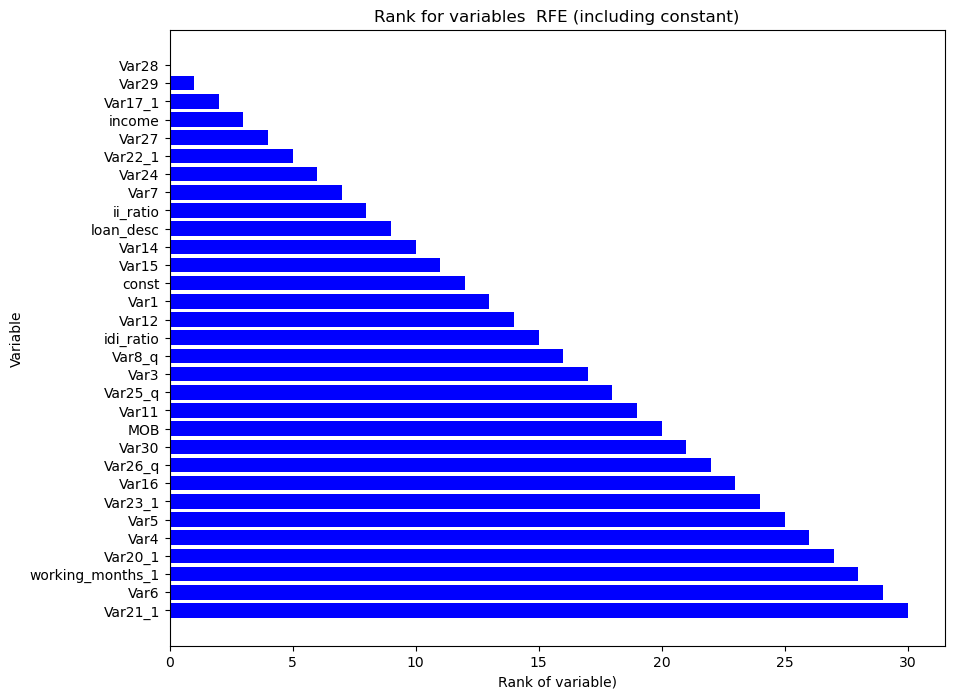

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Przygotowanie rankingu cech zorientowanego na 0-based indexing
ranking_0_based = np.array([13, 21, 14, 27, 26, 30, 8, 12, 24, 7, 2, 22, 18, 20, 15, 11, 5, 1, 4, 10, 17, 19, 23, 28, 31, 6, 25, 3, 29, 9, 16]) - 1

# Sortowanie indeksów według rankingu
sorted_idx = np.argsort(ranking_0_based)

# Utworzenie posortowanej listy rankingów
sorted_ranking = ranking_0_based[sorted_idx]

# Zakładając, że mamy listę wszystkich nazw cech, wliczając stałą
feature_names = X_train_sm.columns

# Utworzenie listy posortowanych nazw cech na podstawie indeksów
sorted_feature_names = [feature_names[i] for i in sorted_idx]

# Tworzenie wykresu rangi ważności cech
plt.figure(figsize=(10, 8))
plt.title("Rank for variables  RFE (including constant)")
plt.barh(range(len(sorted_feature_names)), sorted_ranking, color='blue', align='center')
plt.yticks(range(len(sorted_feature_names)), sorted_feature_names)
plt.xlabel("Rank of variable)")
plt.ylabel("Variable")
plt.gca().invert_yaxis()  # Odwrócenie kolejności, aby najważniejsze cechy były na górze
plt.show()


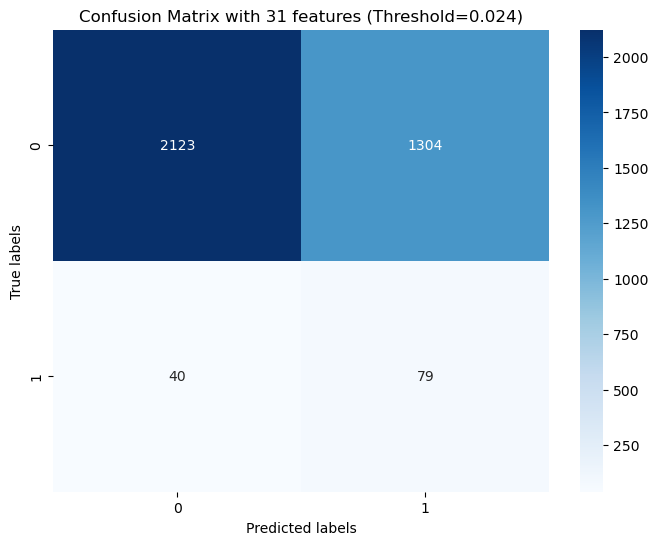

Features removed: []



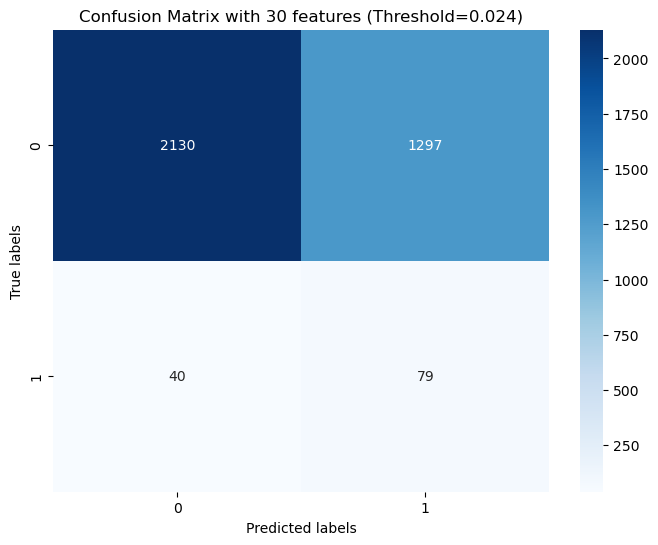

Features removed: ['const']



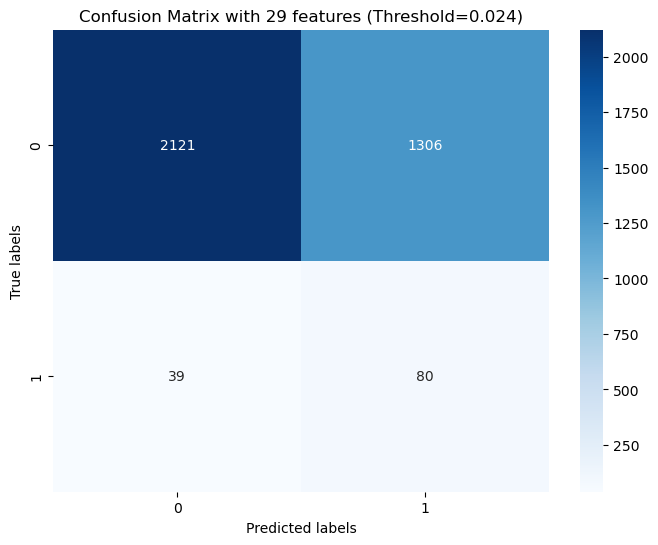

Features removed: ['const', 'MOB']



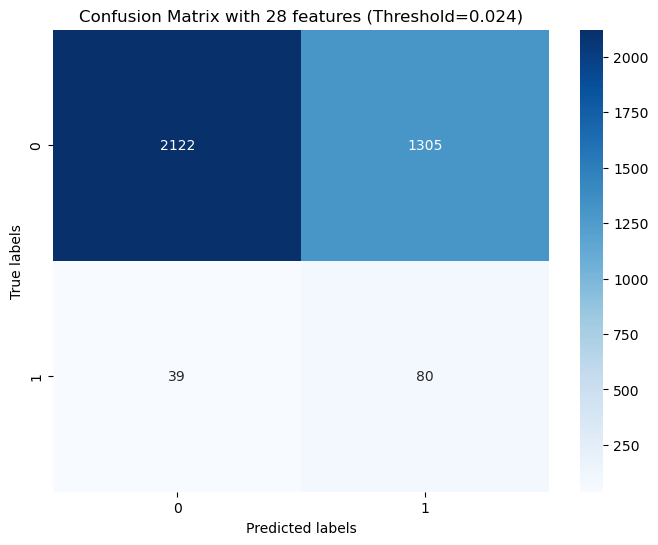

Features removed: ['const', 'MOB', 'Var1']



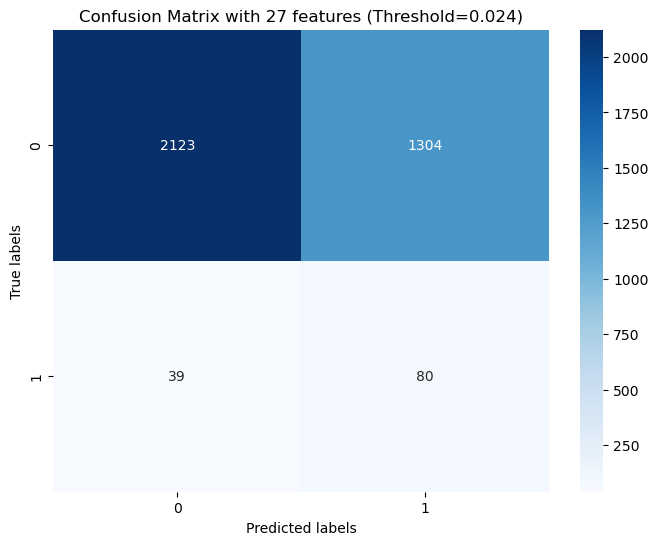

Features removed: ['const', 'MOB', 'Var1', 'Var4']



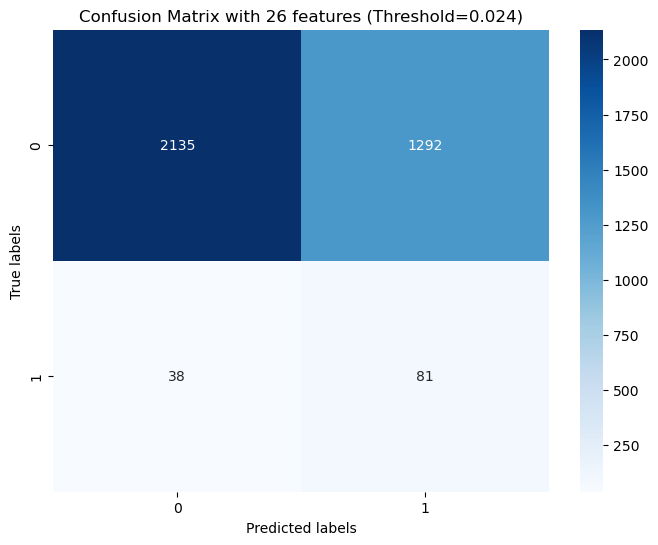

Features removed: ['const', 'MOB', 'Var1', 'Var4', 'Var5']



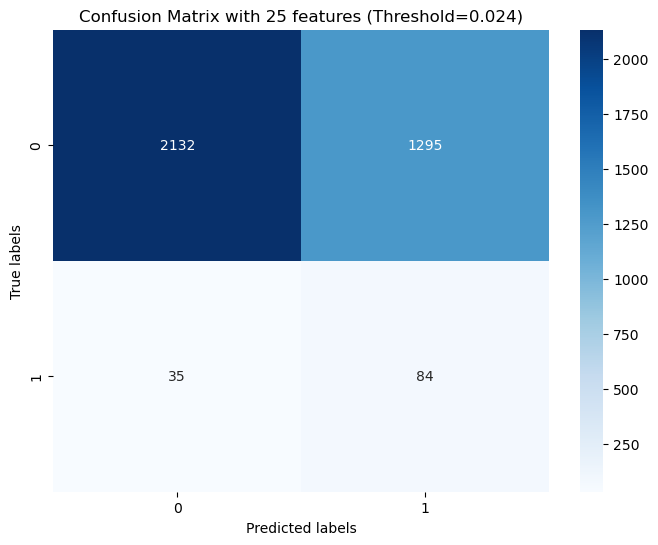

Features removed: ['const', 'MOB', 'Var1', 'Var4', 'Var5', 'Var6']



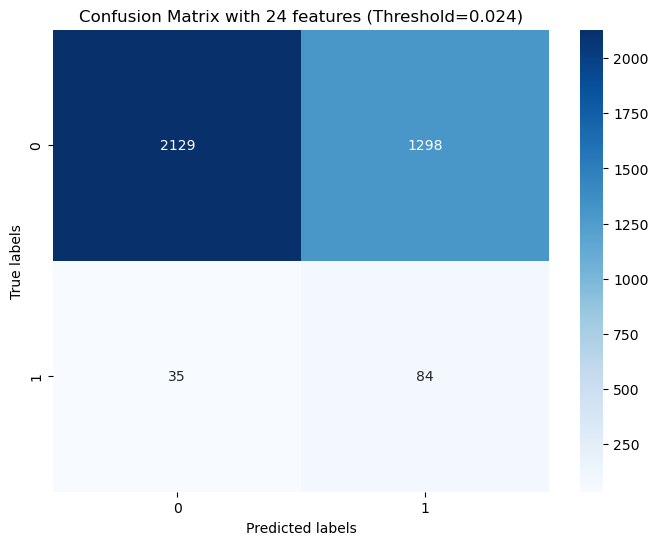

Features removed: ['const', 'MOB', 'Var1', 'Var4', 'Var5', 'Var6', 'Var7']



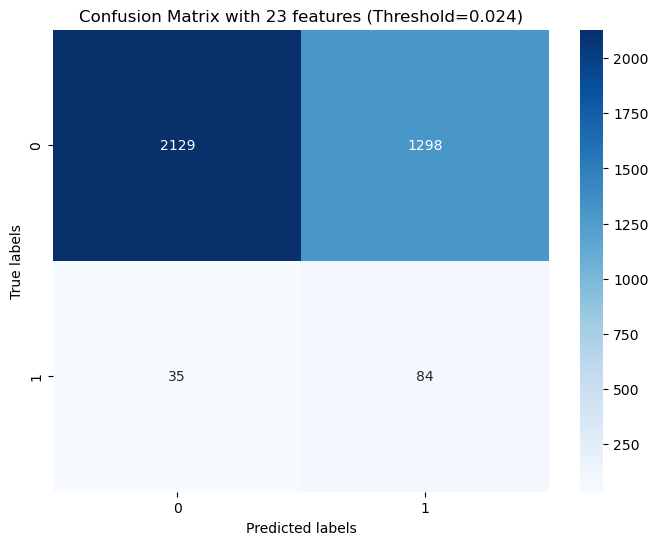

Features removed: ['const', 'MOB', 'Var1', 'Var4', 'Var5', 'Var6', 'Var7', 'Var15']



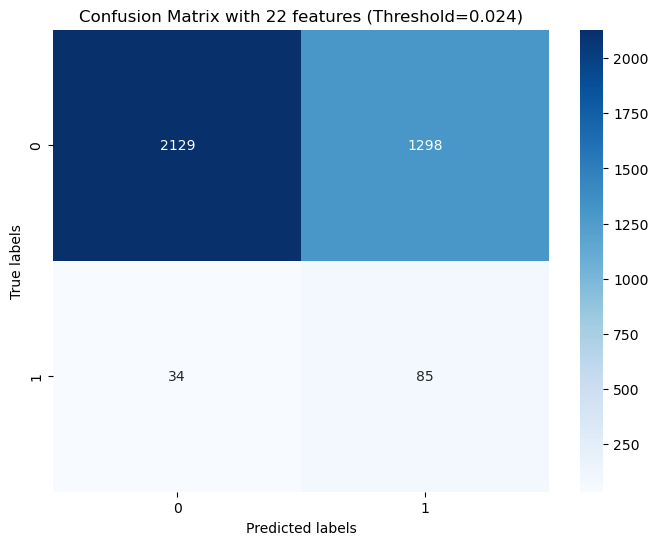

Features removed: ['const', 'MOB', 'Var1', 'Var4', 'Var5', 'Var6', 'Var7', 'Var15', 'Var16']



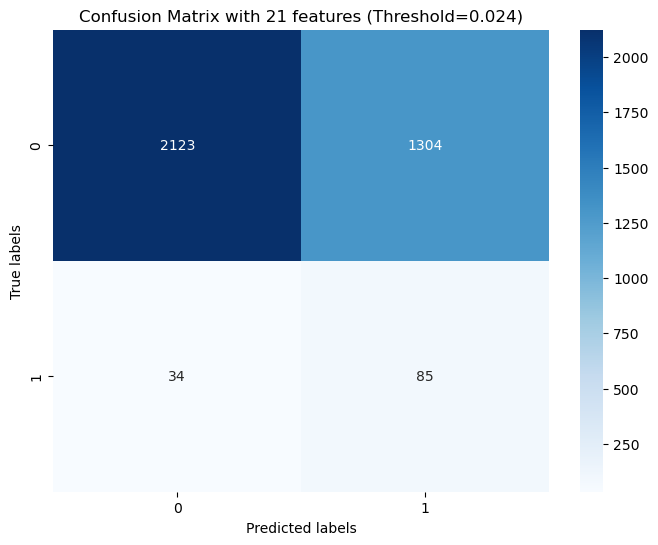

Features removed: ['const', 'MOB', 'Var1', 'Var4', 'Var5', 'Var6', 'Var7', 'Var15', 'Var16', 'Var24']



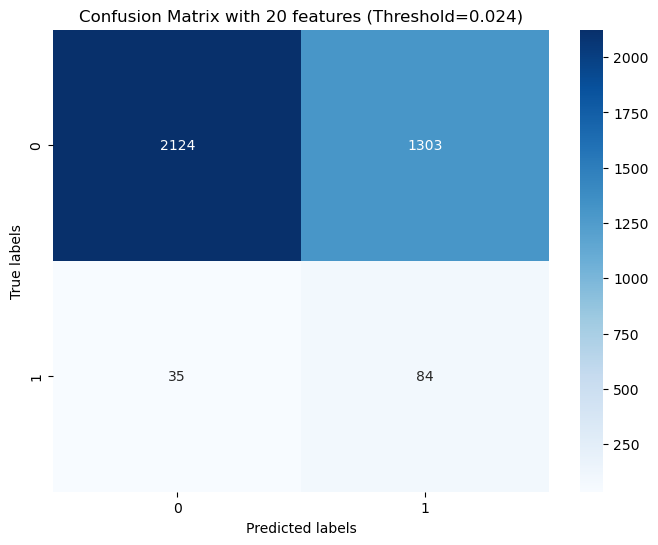

Features removed: ['const', 'MOB', 'Var1', 'Var4', 'Var5', 'Var6', 'Var7', 'Var15', 'Var16', 'Var24', 'Var29']



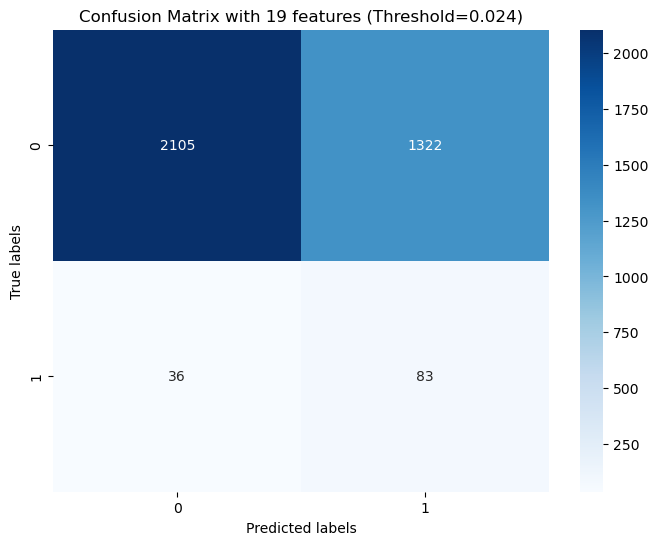

Features removed: ['const', 'MOB', 'Var1', 'Var4', 'Var5', 'Var6', 'Var7', 'Var15', 'Var16', 'Var24', 'Var29', 'Var30']



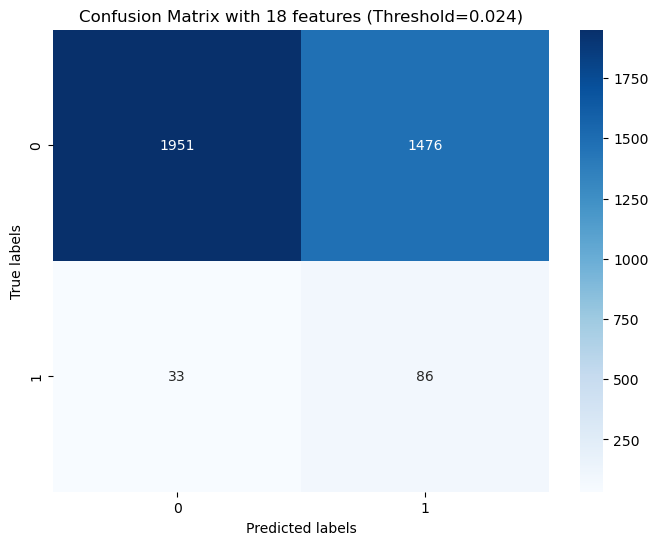

Features removed: ['const', 'MOB', 'Var1', 'Var4', 'Var5', 'Var6', 'Var7', 'Var15', 'Var16', 'Var24', 'Var29', 'Var30', 'Var3']



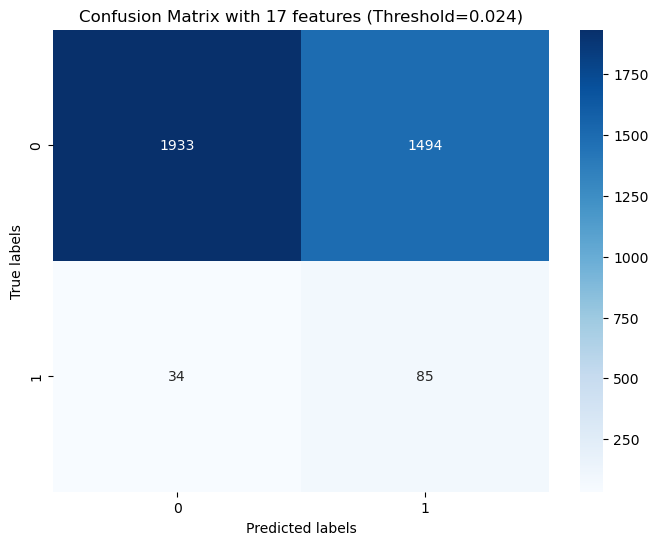

Features removed: ['const', 'MOB', 'Var1', 'Var4', 'Var5', 'Var6', 'Var7', 'Var15', 'Var16', 'Var24', 'Var29', 'Var30', 'Var3', 'Var11']



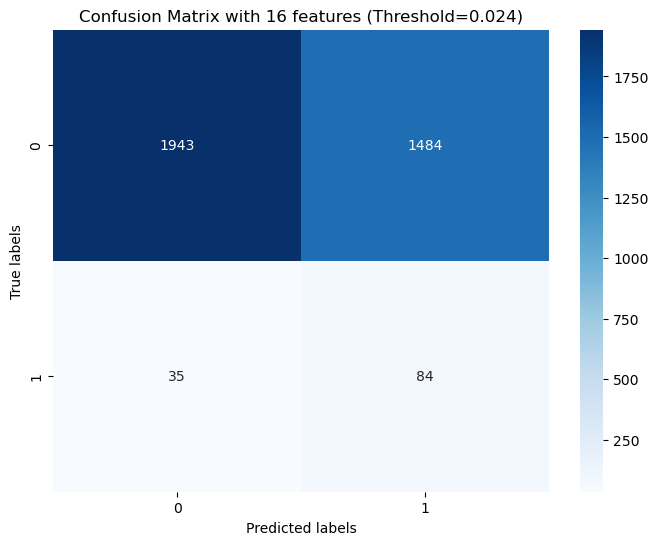

Features removed: ['const', 'MOB', 'Var1', 'Var4', 'Var5', 'Var6', 'Var7', 'Var15', 'Var16', 'Var24', 'Var29', 'Var30', 'Var3', 'Var11', 'Var12']



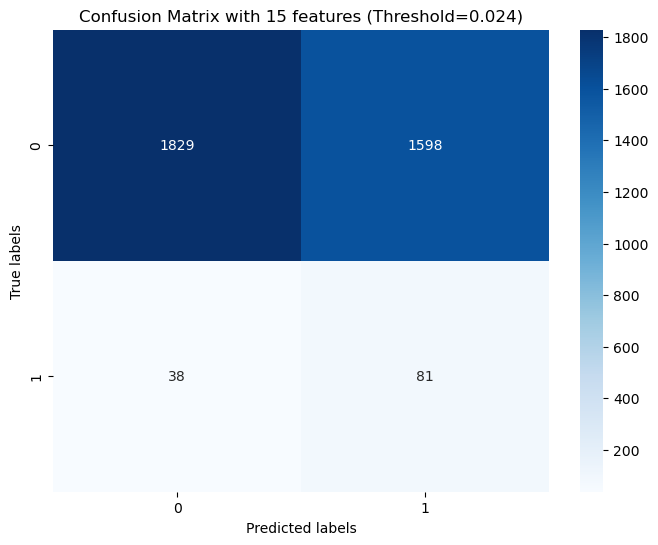

Features removed: ['const', 'MOB', 'Var1', 'Var4', 'Var5', 'Var6', 'Var7', 'Var15', 'Var16', 'Var24', 'Var29', 'Var30', 'Var3', 'Var11', 'Var12', 'Var14']



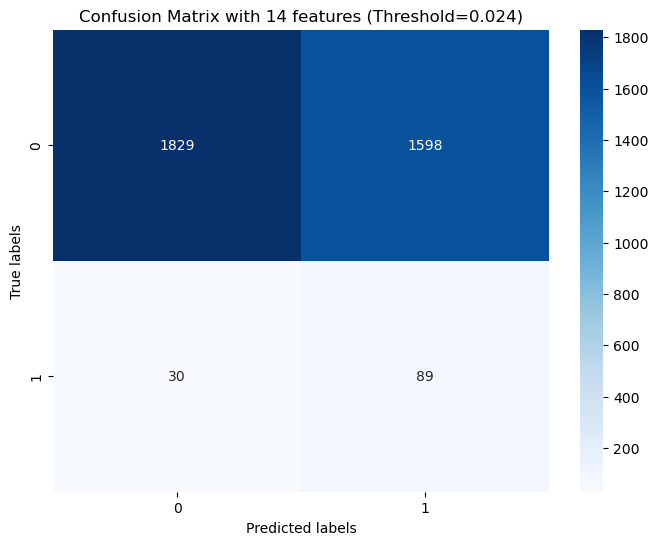

Features removed: ['const', 'MOB', 'Var1', 'Var4', 'Var5', 'Var6', 'Var7', 'Var15', 'Var16', 'Var24', 'Var29', 'Var30', 'Var3', 'Var11', 'Var12', 'Var14', 'Var27']



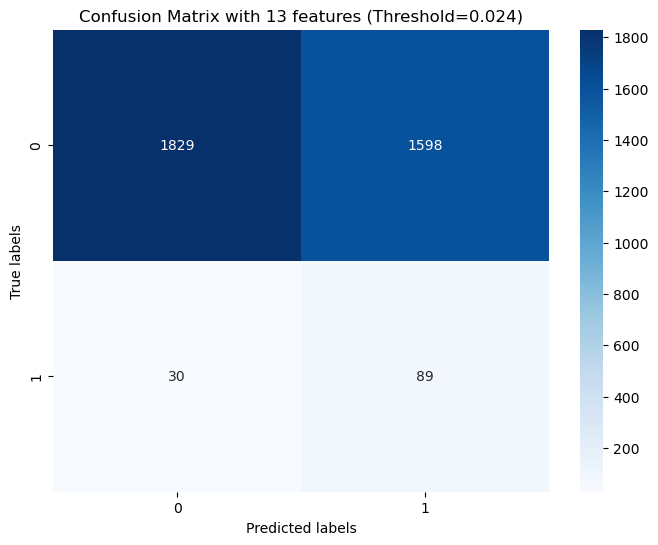

Features removed: ['const', 'MOB', 'Var1', 'Var4', 'Var5', 'Var6', 'Var7', 'Var15', 'Var16', 'Var24', 'Var29', 'Var30', 'Var3', 'Var11', 'Var12', 'Var14', 'Var27', 'Var28']



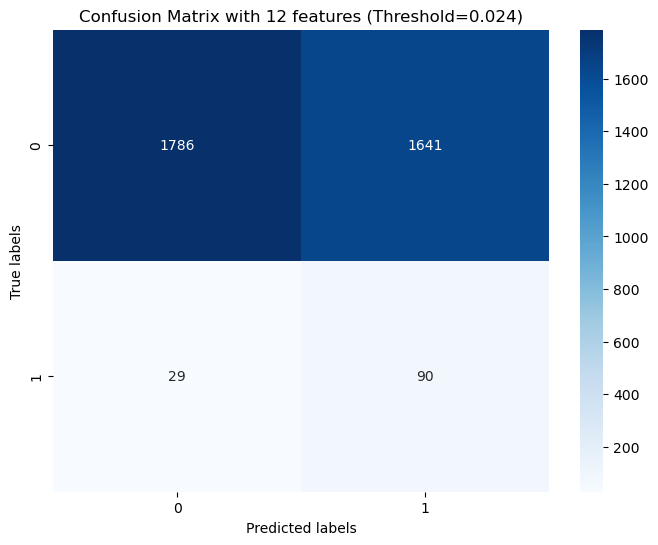

Features removed: ['const', 'MOB', 'Var1', 'Var4', 'Var5', 'Var6', 'Var7', 'Var15', 'Var16', 'Var24', 'Var29', 'Var30', 'Var3', 'Var11', 'Var12', 'Var14', 'Var27', 'Var28', 'income']



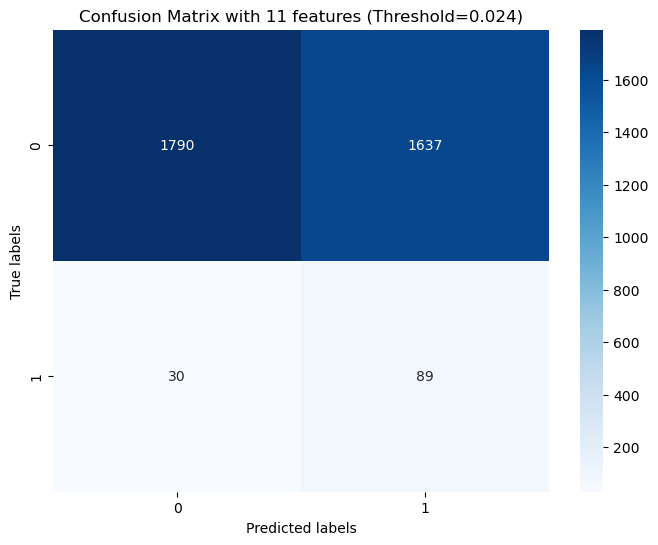

Features removed: ['const', 'MOB', 'Var1', 'Var4', 'Var5', 'Var6', 'Var7', 'Var15', 'Var16', 'Var24', 'Var29', 'Var30', 'Var3', 'Var11', 'Var12', 'Var14', 'Var27', 'Var28', 'income', 'loan_desc']



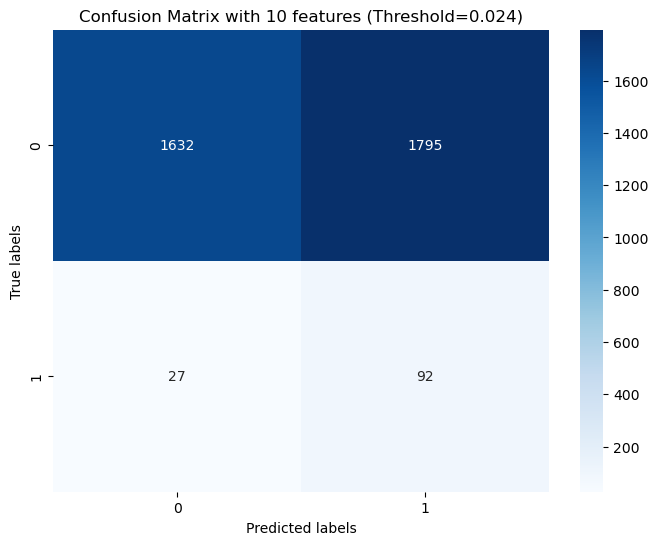

Features removed: ['const', 'MOB', 'Var1', 'Var4', 'Var5', 'Var6', 'Var7', 'Var15', 'Var16', 'Var24', 'Var29', 'Var30', 'Var3', 'Var11', 'Var12', 'Var14', 'Var27', 'Var28', 'income', 'loan_desc', 'Var8_q']



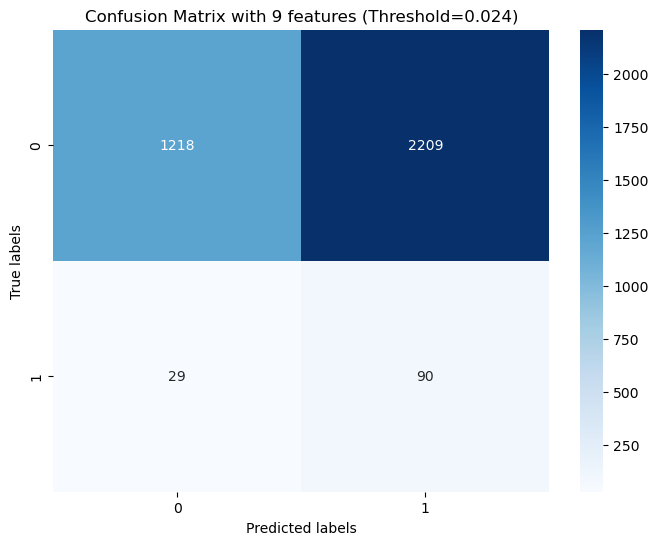

Features removed: ['const', 'MOB', 'Var1', 'Var4', 'Var5', 'Var6', 'Var7', 'Var15', 'Var16', 'Var24', 'Var29', 'Var30', 'Var3', 'Var11', 'Var12', 'Var14', 'Var27', 'Var28', 'income', 'loan_desc', 'Var8_q', 'Var25_q']



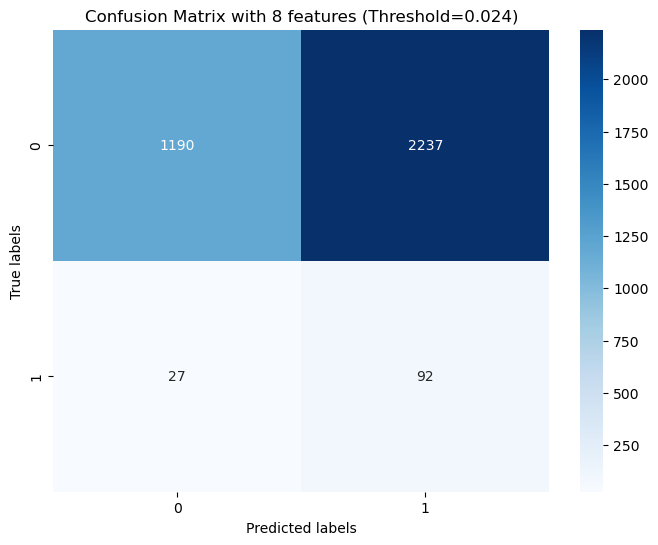

Features removed: ['const', 'MOB', 'Var1', 'Var4', 'Var5', 'Var6', 'Var7', 'Var15', 'Var16', 'Var24', 'Var29', 'Var30', 'Var3', 'Var11', 'Var12', 'Var14', 'Var27', 'Var28', 'income', 'loan_desc', 'Var8_q', 'Var25_q', 'Var26_q']



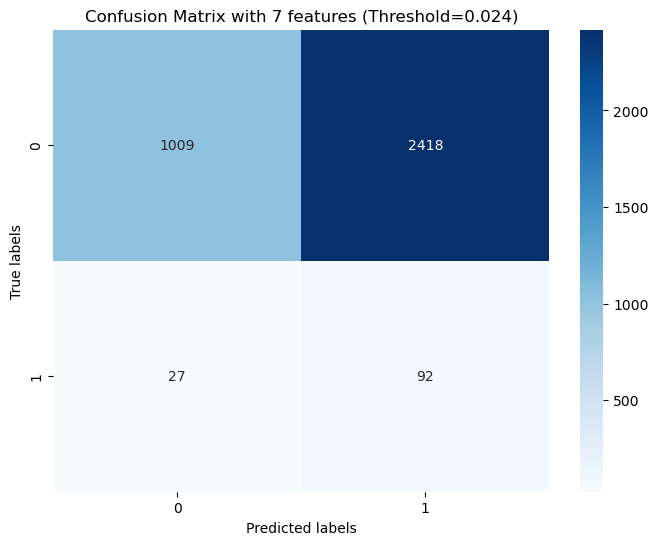

Features removed: ['const', 'MOB', 'Var1', 'Var4', 'Var5', 'Var6', 'Var7', 'Var15', 'Var16', 'Var24', 'Var29', 'Var30', 'Var3', 'Var11', 'Var12', 'Var14', 'Var27', 'Var28', 'income', 'loan_desc', 'Var8_q', 'Var25_q', 'Var26_q', 'Var20_1']



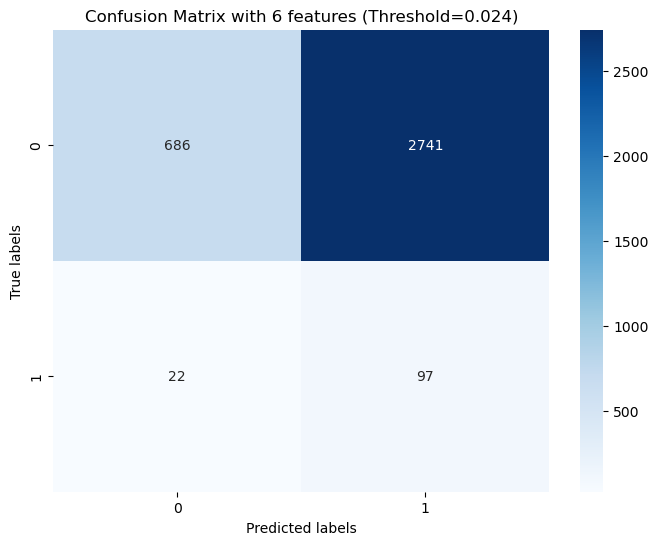

Features removed: ['const', 'MOB', 'Var1', 'Var4', 'Var5', 'Var6', 'Var7', 'Var15', 'Var16', 'Var24', 'Var29', 'Var30', 'Var3', 'Var11', 'Var12', 'Var14', 'Var27', 'Var28', 'income', 'loan_desc', 'Var8_q', 'Var25_q', 'Var26_q', 'Var20_1', 'Var21_1']



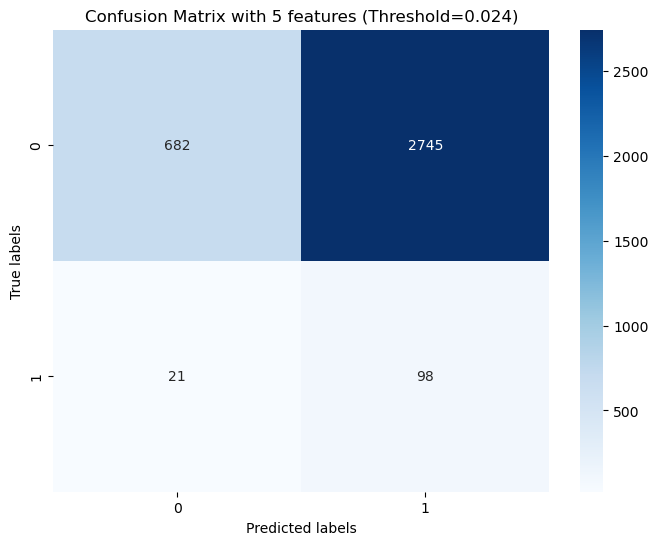

Features removed: ['const', 'MOB', 'Var1', 'Var4', 'Var5', 'Var6', 'Var7', 'Var15', 'Var16', 'Var24', 'Var29', 'Var30', 'Var3', 'Var11', 'Var12', 'Var14', 'Var27', 'Var28', 'income', 'loan_desc', 'Var8_q', 'Var25_q', 'Var26_q', 'Var20_1', 'Var21_1', 'Var22_1']



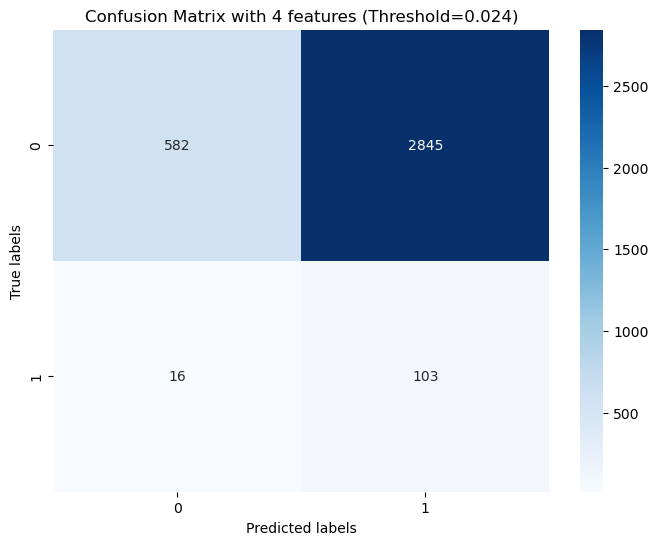

Features removed: ['const', 'MOB', 'Var1', 'Var4', 'Var5', 'Var6', 'Var7', 'Var15', 'Var16', 'Var24', 'Var29', 'Var30', 'Var3', 'Var11', 'Var12', 'Var14', 'Var27', 'Var28', 'income', 'loan_desc', 'Var8_q', 'Var25_q', 'Var26_q', 'Var20_1', 'Var21_1', 'Var22_1', 'Var23_1']



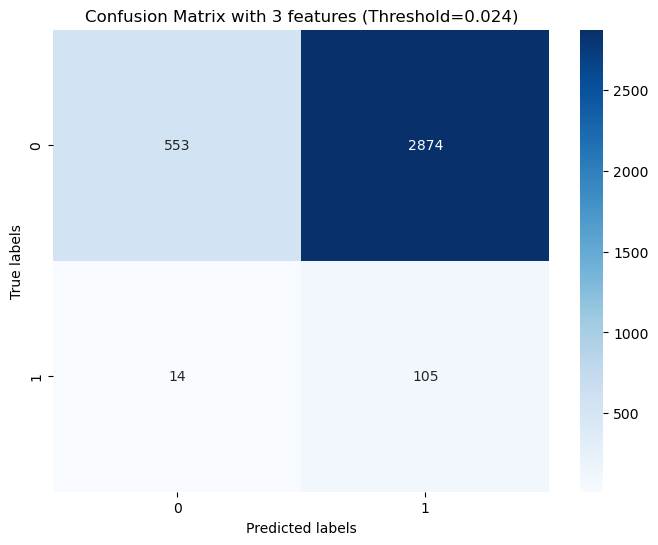

Features removed: ['const', 'MOB', 'Var1', 'Var4', 'Var5', 'Var6', 'Var7', 'Var15', 'Var16', 'Var24', 'Var29', 'Var30', 'Var3', 'Var11', 'Var12', 'Var14', 'Var27', 'Var28', 'income', 'loan_desc', 'Var8_q', 'Var25_q', 'Var26_q', 'Var20_1', 'Var21_1', 'Var22_1', 'Var23_1', 'Var17_1']



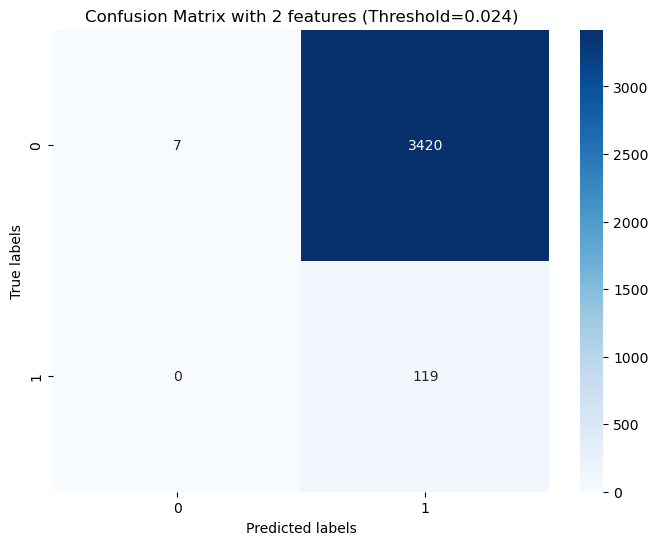

Features removed: ['const', 'MOB', 'Var1', 'Var4', 'Var5', 'Var6', 'Var7', 'Var15', 'Var16', 'Var24', 'Var29', 'Var30', 'Var3', 'Var11', 'Var12', 'Var14', 'Var27', 'Var28', 'income', 'loan_desc', 'Var8_q', 'Var25_q', 'Var26_q', 'Var20_1', 'Var21_1', 'Var22_1', 'Var23_1', 'Var17_1', 'working_months_1']



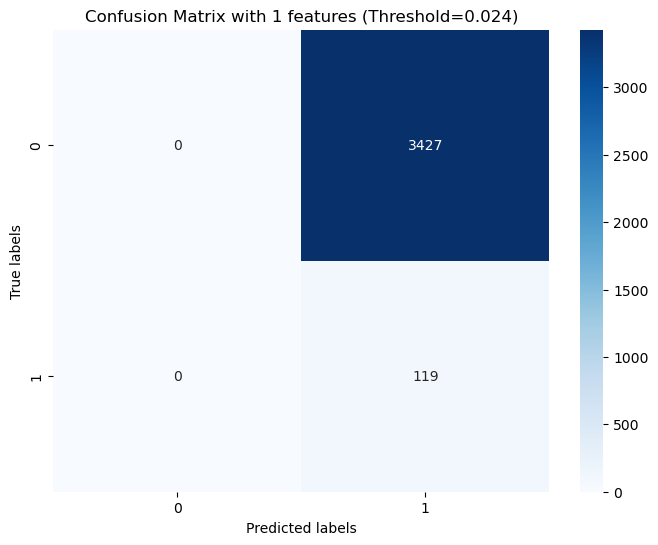

Features removed: ['const', 'MOB', 'Var1', 'Var4', 'Var5', 'Var6', 'Var7', 'Var15', 'Var16', 'Var24', 'Var29', 'Var30', 'Var3', 'Var11', 'Var12', 'Var14', 'Var27', 'Var28', 'income', 'loan_desc', 'Var8_q', 'Var25_q', 'Var26_q', 'Var20_1', 'Var21_1', 'Var22_1', 'Var23_1', 'Var17_1', 'working_months_1', 'ii_ratio']



In [25]:
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Ranking cech zorientowany na 0-based indexing
ranking_0_based = np.array([13, 21, 14, 27, 26, 30, 8, 12, 24, 7, 2, 22, 18, 20, 15, 11, 5, 1, 4, 10, 17, 19, 23, 28, 31, 6, 25, 3, 29, 9, 16]) - 1

# Stała progowa
threshold = 0.024

# Przygotowanie listy nazw cech
feature_names = X_train_sm.columns.tolist()

# Iteracyjne trenowanie modeli
for i in range(len(ranking_0_based)):
    # Indeksy cech do uwzględnienia w modelu
    selected_feature_indices = ranking_0_based[i:]
    
    # Nazwy wybranych cech
    selected_features = [feature_names[j] for j in selected_feature_indices]
    
    # Przygotowanie danych z wybranymi cechami
    X_train_selected = X_train_sm[selected_features]
    X_test_selected = X_test_sm[selected_features]
    
    # Dodanie stałej do modelu
    X_train_selected = sm.add_constant(X_train_selected)
    X_test_selected = sm.add_constant(X_test_selected)
    
    # Trenowanie modelu
    model = sm.Logit(y_train_sm, X_train_selected).fit(disp=0)
    
    # Predykcja na danych testowych
    y_pred_prob = model.predict(X_test_selected)
    y_pred = (y_pred_prob >= threshold).astype(int)
    
    # Obliczenie macierzy pomyłek
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Wyświetlenie wykresu macierzy pomyłek
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(f'Confusion Matrix with {len(selected_features)} features (Threshold={threshold})')
    plt.show()
    
    # Wydrukowanie listy cech usuniętych
    print(f"Features removed: {feature_names[:i]}\n")


In [15]:
def prepare_balanced_data(df, ratio):
    df_majority = df[df.target == 0]
    df_minority = df[df.target == 1]
    n_samples = int(len(df_minority) * ratio) if ratio <= len(df_majority) / len(df_minority) else len(df_majority)
    df_majority_downsampled = resample(df_majority, replace=False, n_samples=n_samples, random_state=123)
    return pd.concat([df_majority_downsampled, df_minority])

# Funkcja do trenowania modelu i obliczania metryk
def train_evaluate_model(X_train, y_train, X_test, y_test):
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    return {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred, zero_division=0),
        'recall': recall_score(y_test, y_pred),
        'f1_score': f1_score(y_test, y_pred)
    }

In [16]:
scalers = {"standard": StandardScaler(), "min_max": MinMaxScaler(), "robust": RobustScaler(), "none": None}
best_models = {}

# Iterowanie przez wszystkie skalery, różne proporcje downsamplingu, podziału zbioru treningowego i różne progi decyzyjne
for scaler_name, scaler in scalers.items():
    best_score = 0
    for downsample_ratio in [0.5, 1, 2, 3]:
        df_train_balanced = prepare_balanced_data(df_train, downsample_ratio)
        for split_ratio in [0.2, 0.3, 0.4, 0.5, 0.6, 0.7]:
            X = df_train_balanced.drop('target', axis=1)
            y = df_train_balanced['target']
            X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=split_ratio, random_state=42)
            
            # Zdefiniowanie y_test tutaj
            y_test = df_test['target']

            # Skalowanie danych, jeśli scaler jest zdefiniowany
            if scaler:
                X_train_scaled = scaler.fit_transform(X_train)
                X_val_scaled = scaler.transform(X_val)
                X_test_scaled = scaler.transform(df_test.drop('target', axis=1))
            else:
                X_train_scaled = X_train
                X_val_scaled = X_val
                X_test_scaled = df_test.drop('target', axis=1)

            # Wybór najlepszej liczby cech przy użyciu RFE
            model = LogisticRegression(max_iter=1000)
            best_n_features = 0
            best_rfe_score = 0
            for n_features_to_select in range(1, X_train_scaled.shape[1] + 1):
                rfe = RFE(estimator=model, n_features_to_select=n_features_to_select)
                rfe.fit(X_train_scaled, y_train)
                X_train_rfe = rfe.transform(X_train_scaled)
                X_val_rfe = rfe.transform(X_val_scaled)

                # Trenowanie i ewaluacja modelu na danych po RFE
                model.fit(X_train_rfe, y_train)
                y_pred_proba = model.predict_proba(X_val_rfe)[:, 1]  # Prawdopodobieństwo klasy 1
                for threshold in np.arange(0.1, 1.0, 0.05):
                    y_pred = (y_pred_proba > threshold).astype(int)  # Klasyfikacja przy użyciu progu
                    f1 = f1_score(y_val, y_pred)
                    if f1 > best_rfe_score:
                        best_rfe_score = f1
                        best_n_features = n_features_to_select
                        best_threshold = threshold

            # Trenowanie modelu na pełnym zbiorze treningowym z wybraną liczbą cech i najlepszym progiem
            rfe = RFE(estimator=model, n_features_to_select=best_n_features)
            rfe.fit(X_train_scaled, y_train)
            X_train_rfe = rfe.transform(X_train_scaled)
            X_test_rfe = rfe.transform(X_test_scaled)
            model.fit(X_train_rfe, y_train)

            # Ewaluacja modelu na zbiorze testowym z najlepszym progiem
            y_test_pred_proba = model.predict_proba(X_test_rfe)[:, 1]
            y_test_pred = (y_test_pred_proba > best_threshold).astype(int)
            test_score = f1_score(y_test, y_test_pred)  # Możesz użyć innej metryki, jeśli chcesz

            # Zapisanie najlepszego modelu dla danego skalera
            if test_score > best_score:
                best_score = test_score
                best_models[scaler_name] = (model, scaler, downsample_ratio, split_ratio, best_threshold)

# Trenowanie najlepszych modeli na pełnych danych treningowych i ocena na zbiorze testowym
final_results = {}
for scaler_name, (model, scaler, downsample_ratio, split_ratio, best_threshold) in best_models.items():
    if scaler:
        X_full_train_scaled = scaler.transform(df_train.drop('target', axis=1))
        X_test_scaled = scaler.transform(df_test.drop('target', axis=1))
    else:
        X_full_train_scaled = df_train.drop('target', axis=1)
        X_test_scaled = df_test.drop('target', axis=1)

    y_full_train = df_train['target']
    y_test = df_test['target']

    model.fit(X_full_train_scaled, y_full_train)
    y_test_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
    y_test_pred = (y_test_pred_proba > best_threshold).astype(int)

    final_metrics = {
        'accuracy': accuracy_score(y_test, y_test_pred),
        'precision': precision_score(y_test, y_test_pred, zero_division=0),
        'recall': recall_score(y_test, y_test_pred),
        'f1_score': f1_score(y_test, y_test_pred)
    }

    final_results[scaler_name] = final_metrics

final_results



{'standard': {'accuracy': 0.9647490129723633,
  'precision': 0.375,
  'recall': 0.07563025210084033,
  'f1_score': 0.12587412587412586},
 'min_max': {'accuracy': 0.9644670050761421,
  'precision': 0.3333333333333333,
  'recall': 0.058823529411764705,
  'f1_score': 0.1},
 'robust': {'accuracy': 0.9644670050761421,
  'precision': 0.3333333333333333,
  'recall': 0.058823529411764705,
  'f1_score': 0.1},
 'none': {'accuracy': 0.9650310208685843,
  'precision': 0.35294117647058826,
  'recall': 0.05042016806722689,
  'f1_score': 0.08823529411764705}}

In [ ]:
"""""


scalers = {"standard": StandardScaler(), "min_max": MinMaxScaler(), "robust": RobustScaler(), "none": None}
best_models = {}

# Iterowanie przez wszystkie skalery i różne proporcje downsamplingu i podziału zbioru treningowego
for scaler_name, scaler in scalers.items():
    best_score = 0
    for downsample_ratio in [0.5, 1, 2, 3]:
        df_train_balanced = prepare_balanced_data(df_train, downsample_ratio)
        for split_ratio in [0.2, 0.3, 0.4, 0.5, 0.6, 0.7]:
            X = df_train_balanced.drop('target', axis=1)
            y = df_train_balanced['target']
            X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=split_ratio, random_state=42)

            # Skalowanie danych, jeśli scaler jest zdefiniowany
            if scaler:
                X_train_scaled = scaler.fit_transform(X_train)
                X_val_scaled = scaler.transform(X_val)
                X_test_scaled = scaler.transform(df_test.drop('target', axis=1))
            else:
                X_train_scaled = X_train
                X_val_scaled = X_val
                X_test_scaled = df_test.drop('target', axis=1)

            # Trenowanie i ewaluacja modelu na zbiorze walidacyjnym
            metrics = train_evaluate_model(X_train_scaled, y_train, X_val_scaled, y_val)
            if metrics['f1_score'] > best_score:
                best_score = metrics['f1_score']
                best_models[scaler_name] = (LogisticRegression(max_iter=1000).fit(X_train_scaled, y_train), scaler, downsample_ratio, split_ratio)

# Dla każdego skalera, trenowanie najlepszego modelu na pełnym zbiorze treningowym i ewaluacja na zbiorze testowym
final_results = {}
for scaler_name, (model, scaler, downsample_ratio, split_ratio) in best_models.items():
    if scaler:
        X_full_train_scaled = scaler.transform(df_train.drop('target', axis=1))
    else:
        X_full_train_scaled = df_train.drop('target', axis=1)
    y_full_train = df_train['target']
    X_test_scaled = scaler.transform(df_test.drop('target', axis=1)) if scaler else df_test.drop('target', axis=1)
    y_test = df_test['target']

    final_metrics = train_evaluate_model(X_full_train_scaled, y_full_train, X_test_scaled, y_test)
    final_results[scaler_name] = final_metrics

final_results
""""